In [68]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 52EE-02DC

 Directory of c:\Users\khanh\AppData\Local\Programs\Microsoft VS Code\masalytics

13/12/2025  12:00 PM    <DIR>          .
12/12/2025  04:18 PM    <DIR>          ..
12/12/2025  04:26 PM    <DIR>          data
12/12/2025  04:02 PM         1,708,442 DataExploration (1).ipynb
12/12/2025  04:23 PM             4,688 gitignore.txt
12/12/2025  04:24 PM             3,289 README.md
13/12/2025  12:00 PM    <DIR>          visualization
               3 File(s)      1,716,419 bytes
               4 Dir(s)  94,136,856,576 bytes free


In [70]:
conn = sqlite3.connect('data/numero_data.sqlite')
cursor = conn.cursor()

In [71]:
df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)
df

,name
0,film_metadata
1,indian_titles
2,sales_raw_data


In [72]:
df_raw = pd.read_sql(
    "SELECT numero_film_id, raw_json FROM sales_raw_data;",
    conn
)

print("df_raw shape:", df_raw.shape)
df_raw.head()

df_raw shape: (100, 2)


,numero_film_id,raw_json
0,48137,"{""2025-02-20"": {""rows"": [{""boxOffice"": {""day1""..."
1,63815,"{""2025-05-22"": {""rows"": [{""boxOffice"": {""day1""..."
2,64826,"{""2025-03-13"": {""rows"": [{""boxOffice"": {""day1""..."
3,66112,"{""2025-04-10"": {""rows"": [{""boxOffice"": {""day1""..."
4,68343,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."


In [73]:
tables = ['film_metadata', 'sales_raw_data', 'indian_titles']
tables

['film_metadata', 'sales_raw_data', 'indian_titles']

In [74]:
from visualization.week1_sales_overview import plot_top10_films_by_total_gross

Now move to the step of inspect schema + row counts for each table

In [75]:
for table in tables:
    print(f"\n{table} columns:")

    column_info = pd.read_sql(f"PRAGMA table_info({table});", conn)
    display(column_info)

    print("\nTotal rows:")
    total_count = pd.read_sql(f"SELECT COUNT(*) AS total_rows FROM {table};", conn)
    print(total_count.iloc[0, 0])


film_metadata columns:


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0



Total rows:
100

sales_raw_data columns:


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,raw_json,TEXT,0,None,0



Total rows:
100

indian_titles columns:


,cid,name,type,notnull,dflt_value,pk
0,0,rank,INTEGER,0,None,0
1,1,title,TEXT,0,None,0
2,2,distributor,TEXT,0,None,0
3,3,release_date,TEXT,0,None,0
4,4,rating,TEXT,0,None,0
5,5,opening_screens,REAL,0,None,0
6,6,opening_screen_average,REAL,0,None,0
7,7,opening_weekend_total,REAL,0,None,0
8,8,opening_week_total,REAL,0,None,0
9,9,lifetime_total,REAL,0,None,0



Total rows:
214


Take a look at the actual data values

In [76]:
for table in tables:
    print(f"\nSample rows from {table}:")
    df_sample = pd.read_sql(f"SELECT * FROM {table} LIMIT 10;", conn)
    display(df_sample)


Sample rows from film_metadata:


,numero_film_id,title
0,48137,Noah's Ark
1,63815,Narivetta
2,64826,The Diplomat
3,66112,Bazooka
4,68343,Emergency
5,68556,Guru Nanak Jahaz
6,71731,Dhadak 2
7,71733,Deva
8,73250,The Fall (2008) 4K RE: 2025
9,75788,Azaad



Sample rows from sales_raw_data:


,numero_film_id,raw_json
0,48137,"{""2025-02-20"": {""rows"": [{""boxOffice"": {""day1""..."
1,63815,"{""2025-05-22"": {""rows"": [{""boxOffice"": {""day1""..."
2,64826,"{""2025-03-13"": {""rows"": [{""boxOffice"": {""day1""..."
3,66112,"{""2025-04-10"": {""rows"": [{""boxOffice"": {""day1""..."
4,68343,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."
5,68556,"{""2025-05-01"": {""rows"": [{""boxOffice"": {""day1""..."
6,71731,"{""2025-07-31"": {""rows"": [{""boxOffice"": {""day1""..."
7,71733,"{""2025-01-30"": {""rows"": [{""boxOffice"": {""day1""..."
8,73250,"{""2025-02-27"": {""rows"": [{""boxOffice"": {""day1""..."
9,75788,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."



Sample rows from indian_titles:


,rank,title,distributor,release_date,rating,opening_screens,opening_screen_average,opening_weekend_total,opening_week_total,lifetime_total
0,1,Kantara A Legend: Chapter 1,Zstars Entertainment,2025-10-02,MA15+,100.0,9957.0,621261.59,995729.07,1821480.20
1,2,Saiyaara,Mindblowing,2025-07-18,M,59.0,6874.0,143460.28,405556.68,1763920.24
2,3,Chhaava,Mindblowing,2025-02-14,MA15+,93.0,7277.0,441056.77,676800.14,1675095.00
3,4,Coolie,Tolly Movies,2025-08-14,MA15+,141.0,9671.0,1271871.07,1363557.81,1446410.71
4,5,L2: Empuraan,Cyber Systems,2025-03-27,MA15+,142.0,9522.0,1233067.67,1352170.50,1404662.94
5,6,Sardaar Ji 3,White Hill,2025-06-26,M,64.0,9853.0,388558.35,630589.45,1212911.80
6,7,Chal Mera Putt 4,Forum Distribution,2025-08-01,PG,86.0,9420.0,553666.14,810094.47,1175117.56
7,8,Sitaare Zameen Par,Forum Distribution,2025-06-20,PG,104.0,6146.0,445848.54,639135.10,1105688.51
8,9,War 2,Mindblowing,2025-08-14,MA15+,148.0,5954.0,741943.09,881148.88,1052431.52
9,10,Lokah Chapter One: Chandra,Wanderlust Films,2025-08-28,MA15+,59.0,6765.0,230529.36,399160.69,956315.15


Do multiple check per table (instead of hard-coding)

In [77]:
def get_all_columns(conn, table_name):
    try:
        df_schema = pd.read_sql(f"PRAGMA table_info({table_name});", conn)
        return df_schema['name'].tolist()
    except Exception as e:
        print(f"Error getting columns for {table_name}: {e}")
        return []
    
for table in tables:
    print(table, ":", get_all_columns(conn, table))

film_metadata : ['numero_film_id', 'title']
sales_raw_data : ['numero_film_id', 'raw_json']
indian_titles : ['rank', 'title', 'distributor', 'release_date', 'rating', 'opening_screens', 'opening_screen_average', 'opening_weekend_total', 'opening_week_total', 'lifetime_total']


In [78]:
def check_missing_values(conn, table_name):
    print(f"\nMissing values for: {table_name}")
    columns = get_all_columns(conn, table_name)
    if not columns:
        return
    
    # Build a SELECT that counts NULLs per column
    null_counts_exprs = [
        f"SUM(CASE WHEN \"{col}\" IS NULL THEN 1 ELSE 0 END) AS \"{col}\""
        for col in columns
    ]
    query = f"""
        SELECT
            {', '.join(null_counts_exprs)}
        FROM {table_name};
    """
    df_nulls = pd.read_sql(query, conn).T
    df_nulls.columns = ['null_count']
    display(df_nulls[df_nulls['null_count'] > 0].sort_values('null_count', ascending=False))

for table in tables:
    check_missing_values(conn, table)


Missing values for: film_metadata


,null_count



Missing values for: sales_raw_data


,null_count



Missing values for: indian_titles


,null_count
opening_screens,4
opening_screen_average,4
opening_weekend_total,4
opening_week_total,4
rating,2


Check for duplicate rows

In [79]:
def check_duplicate(conn, table_name):
    print(f"\nDuplicate rows in: {table_name}")
    query = f"""
        SELECT COUNT(*) AS total_rows,
               COUNT(DISTINCT *) AS distinct_rows
        FROM {table_name};
    """
    # SQLite doesn't allow COUNT(DISTINCT *) directly, so we work around:
    df_all = pd.read_sql(f"SELECT * FROM {table_name};", conn)
    total_rows = len(df_all)
    distinct_rows = len(df_all.drop_duplicates())
    print("Total rows:   ", total_rows)
    print("Distinct rows:", distinct_rows)
    print("Duplicates:   ", total_rows - distinct_rows)

for table in tables:
    check_duplicate(conn, table)


Duplicate rows in: film_metadata
Total rows:    100
Distinct rows: 100
Duplicates:    0

Duplicate rows in: sales_raw_data
Total rows:    100
Distinct rows: 100
Duplicates:    0

Duplicate rows in: indian_titles
Total rows:    214
Distinct rows: 214
Duplicates:    0


Table 'Indian_Titles': Basic Understanding

In [80]:
indian_titles = pd.read_sql("SELECT * FROM indian_titles;", conn)
indian_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    214 non-null    int64  
 1   title                   214 non-null    object 
 2   distributor             214 non-null    object 
 3   release_date            214 non-null    object 
 4   rating                  212 non-null    object 
 5   opening_screens         210 non-null    float64
 6   opening_screen_average  210 non-null    float64
 7   opening_weekend_total   210 non-null    float64
 8   opening_week_total      210 non-null    float64
 9   lifetime_total          214 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 16.8+ KB


In [81]:
numeric_cols = [
    "rating",
    "opening_screens",
    "opening_screen_average",
    "opening_weekend_total",
    "opening_week_total",
    "lifetime_total"
]

# Keep only columns that actually exist (defensive)
numeric_cols = [c for c in numeric_cols if c in indian_titles.columns]

indian_titles[numeric_cols].describe()

,opening_screens,opening_screen_average,opening_weekend_total,opening_week_total,lifetime_total
count,210.000000,210.000000,2.100000e+02,2.100000e+02,2.140000e+02
mean,30.376190,2094.247619,8.053015e+04,1.063728e+05,1.492920e+05
std,31.835498,2325.367873,1.696289e+05,2.106553e+05,3.145536e+05
min,1.000000,19.000000,3.700000e+01,3.700000e+01,1.000000e+01
25%,5.000000,516.750000,2.048600e+03,2.787253e+03,2.884672e+03
50%,21.000000,1214.500000,1.272088e+04,1.626750e+04,1.863769e+04
75%,49.500000,2706.000000,7.832290e+04,1.009413e+05,1.446534e+05
max,148.000000,12060.000000,1.271871e+06,1.363558e+06,1.821480e+06


In [82]:
query_range = """
    SELECT
        MIN(release_date) AS earliest_release,
        MAX(release_date) AS latest_release
    FROM indian_titles
    WHERE release_date IS NOT NULL
      AND release_date != '';
"""
date_range = pd.read_sql(query_range, conn)
date_range #To check the monthly volumn as well as the release date range

,earliest_release,latest_release
0,2025-01-02,2025-10-31


In [83]:
query_month = """
    SELECT
        SUBSTR(release_date, 1, 7) AS year_month,  -- YYYY-MM
        COUNT(*) AS film_count
    FROM indian_titles
    WHERE release_date IS NOT NULL
      AND release_date != ''
    GROUP BY year_month
    ORDER BY year_month;
"""
films_per_month = pd.read_sql(query_month, conn)
films_per_month

,year_month,film_count
0,2025-01,21
1,2025-02,29
2,2025-03,17
3,2025-04,18
4,2025-05,25
5,2025-06,16
6,2025-07,20
7,2025-08,21
8,2025-09,17
9,2025-10,30


EXPLORE THE JSON FILE (SALES_RAW_DATA REDO)

In [84]:
example = pd.read_sql(
    "SELECT numero_film_id, raw_json FROM sales_raw_data LIMIT 5;", 
    conn)
example

,numero_film_id,raw_json
0,48137,"{""2025-02-20"": {""rows"": [{""boxOffice"": {""day1""..."
1,63815,"{""2025-05-22"": {""rows"": [{""boxOffice"": {""day1""..."
2,64826,"{""2025-03-13"": {""rows"": [{""boxOffice"": {""day1""..."
3,66112,"{""2025-04-10"": {""rows"": [{""boxOffice"": {""day1""..."
4,68343,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."


In [85]:
raw_json_string = example['raw_json'].iloc[0]

# Parse JSON into Python object (dict / list)
json_data = json.loads(raw_json_string)

# Pretty-print to understand the structure
print(json.dumps(json_data, indent=2))

{
  "2025-02-20": {
    "rows": [
      {
        "boxOffice": {
          "day1": {
            "previousAdmissions": {},
            "today": 9701
          },
          "day2": {
            "previousAdmissions": {},
            "today": 9952,
            "yesterday": 9701
          },
          "day3": {
            "previousAdmissions": {},
            "today": 63552,
            "yesterday": 9952
          },
          "day4": {
            "previousAdmissions": {},
            "today": 48450,
            "yesterday": 63552
          },
          "day5": {
            "previousAdmissions": {},
            "today": 2200,
            "yesterday": 48450
          },
          "day6": {
            "previousAdmissions": {},
            "today": 6149,
            "yesterday": 2200
          },
          "day7": {
            "previousAdmissions": {},
            "today": 6101,
            "yesterday": 6149
          },
          "week": {
            "gross": 146105
          },
     

In [86]:
# 1. Take the raw_json of the first film
sample_raw = df_raw['raw_json'].iloc[0]

print("First 300 characters of raw_json:")
print(sample_raw[:300])          # just to see that it's JSON text

# 2. Parse it into Python objects
data = json.loads(sample_raw)

print("\nType of parsed data:", type(data))

First 300 characters of raw_json:
{"2025-02-20": {"rows": [{"boxOffice": {"day1": {"previousAdmissions": {}, "today": 9701}, "day2": {"previousAdmissions": {}, "today": 9952, "yesterday": 9701}, "day3": {"previousAdmissions": {}, "today": 63552, "yesterday": 9952}, "day4": {"previousAdmissions": {}, "today": 48450, "yesterday": 6355

Type of parsed data: <class 'dict'>


In [87]:
# We are continuing from the previous cell where `data` is already defined

# 1. Look at the first few top-level keys
top_keys = list(data.keys())
print("Number of top-level keys:", len(top_keys))
print("First 5 top-level keys:", top_keys[:5])

# 2. Take the first week key and inspect its content
first_key = top_keys[0]
week_content = data[first_key]

print("\nFirst key:", first_key)
print("Type of week_content:", type(week_content))

if isinstance(week_content, dict):
    print("Keys in week_content:", list(week_content.keys()))

    rows = week_content.get("rows")
    print("\nType of rows:", type(rows))
    if isinstance(rows, list):
        print("Number of rows in 'rows':", len(rows))
        if len(rows) > 0:
            first_row = rows[0]
            print("\nKeys in first cinema row:", list(first_row.keys()))

            box_office = first_row.get("boxOffice", {})
            print("\nType of box_office:", type(box_office))
            if isinstance(box_office, dict):
                print("Keys in box_office:", list(box_office.keys()))

Number of top-level keys: 26
First 5 top-level keys: ['2025-02-20', '2025-02-27', '2025-03-06', '2025-03-13', '2025-03-20']

First key: 2025-02-20
Type of week_content: <class 'dict'>
Keys in week_content: ['rows', 'totals']

Type of rows: <class 'list'>
Number of rows in 'rows': 111

Keys in first cinema row: ['boxOffice', 'circuit', 'circuitId', 'city', 'cityId', 'rank', 'region', 'regionId', 'release', 'state', 'stateId', 'theatre', 'theatreId']

Type of box_office: <class 'dict'>
Keys in box_office: ['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7', 'week', 'weekend']


In [88]:
def flatten_sales_json(df_raw: pd.DataFrame) -> pd.DataFrame:
    all_frames = []

    for _, row in df_raw.iterrows():
        film_id = int(row['numero_film_id'])
        raw = row['raw_json']

        df_one = flatten_one_film(raw, film_id)

        if not df_one.empty:
            all_frames.append(df_one)

    if all_frames:
        result = pd.concat(all_frames, ignore_index=True)
    else:
        result = pd.DataFrame(
            columns=["numero_film_id", "actual_sales_date",
                     "state", "city", "theatre_name", "gross_today"]
        )

    return result

In [89]:
sales = flatten_sales_json(df_raw)
print("sales shape:", sales.shape)
sales.head()

# make sure types are correct
sales['actual_sales_date'] = pd.to_datetime(sales['actual_sales_date'], errors='coerce')
sales['gross_today'] = pd.to_numeric(sales['gross_today'], errors='coerce')

sales.dtypes

sales shape: (65947, 6)


numero_film_id                int64
actual_sales_date    datetime64[ns]
state                        object
city                         object
theatre_name                 object
gross_today                 float64
dtype: object

In [90]:
df_raw = pd.read_sql(
    "SELECT numero_film_id, raw_json FROM sales_raw_data;",
    conn
)

print("df_raw shape:", df_raw.shape)

sales = flatten_sales_json(df_raw)
print("sales shape:", sales.shape)
sales.head()

df_raw shape: (100, 2)
sales shape: (65947, 6)


,numero_film_id,actual_sales_date,state,city,theatre_name,gross_today
0,48137,2025-02-20,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,9701.0
1,48137,2025-02-21,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,9952.0
2,48137,2025-02-22,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,63552.0
3,48137,2025-02-23,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,48450.0
4,48137,2025-02-24,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,2200.0


In [91]:
pd.read_sql("SELECT COUNT(*) AS n_rows FROM sales_raw_data;", conn)

,n_rows
0,100


In [92]:
sales['gross_today'] = pd.to_numeric(sales['gross_today'], errors='coerce')
#Make sure the column is numeric (to_numeric)

In [93]:
film_totals = (
    sales
    .groupby('numero_film_id', as_index=False)['gross_today']
    .sum()
    .rename(columns={'gross_today': 'total_gross'})
)

film_totals.head()

,numero_film_id,total_gross
0,48137,7163467.0
1,63815,6146995.0
2,64826,9748892.0
3,66112,5045325.0
4,68343,5383739.0


In [94]:
pd.read_sql("PRAGMA table_info(indian_titles);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,rank,INTEGER,0,None,0
1,1,title,TEXT,0,None,0
2,2,distributor,TEXT,0,None,0
3,3,release_date,TEXT,0,None,0
4,4,rating,TEXT,0,None,0
5,5,opening_screens,REAL,0,None,0
6,6,opening_screen_average,REAL,0,None,0
7,7,opening_weekend_total,REAL,0,None,0
8,8,opening_week_total,REAL,0,None,0
9,9,lifetime_total,REAL,0,None,0


In [95]:
pd.read_sql("SELECT * FROM indian_titles LIMIT 5;", conn)

,rank,title,distributor,release_date,rating,opening_screens,opening_screen_average,opening_weekend_total,opening_week_total,lifetime_total
0,1,Kantara A Legend: Chapter 1,Zstars Entertainment,2025-10-02,MA15+,100.0,9957.0,621261.59,995729.07,1821480.20
1,2,Saiyaara,Mindblowing,2025-07-18,M,59.0,6874.0,143460.28,405556.68,1763920.24
2,3,Chhaava,Mindblowing,2025-02-14,MA15+,93.0,7277.0,441056.77,676800.14,1675095.00
3,4,Coolie,Tolly Movies,2025-08-14,MA15+,141.0,9671.0,1271871.07,1363557.81,1446410.71
4,5,L2: Empuraan,Cyber Systems,2025-03-27,MA15+,142.0,9522.0,1233067.67,1352170.50,1404662.94


In [96]:
pd.read_sql("PRAGMA table_info(film_metadata);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0


In [97]:
pd.read_sql("SELECT * FROM film_metadata LIMIT 5;", conn)

,numero_film_id,title
0,48137,Noah's Ark
1,63815,Narivetta
2,64826,The Diplomat
3,66112,Bazooka
4,68343,Emergency


In [98]:
sales['gross_today'] = pd.to_numeric(sales['gross_today'], errors='coerce')

In [99]:
film_totals = (
    sales
    .groupby('numero_film_id', as_index=False)['gross_today']
    .sum()
    .rename(columns={'gross_today': 'total_gross'})
)

film_totals.head()

,numero_film_id,total_gross
0,48137,7163467.0
1,63815,6146995.0
2,64826,9748892.0
3,66112,5045325.0
4,68343,5383739.0


In [100]:
film_meta = pd.read_sql(
    """
    SELECT numero_film_id, title
    FROM film_metadata;
    """,
    conn
)

film_totals_with_titles = film_totals.merge(
    film_meta,
    on='numero_film_id',
    how='left'
)

film_totals_with_titles.head()

,numero_film_id,total_gross,title
0,48137,7163467.0,Noah's Ark
1,63815,6146995.0,Narivetta
2,64826,9748892.0,The Diplomat
3,66112,5045325.0,Bazooka
4,68343,5383739.0,Emergency


In [101]:
top10_films = (
    film_totals_with_titles
        .sort_values("total_gross", ascending=False)
        .head(10)
)

In [102]:
!python -m pip install matplotlib

In [103]:
list(sales.columns)

['numero_film_id',
 'actual_sales_date',
 'state',
 'city',
 'theatre_name',
 'gross_today']

In [104]:
sales[['actual_sales_date', 'gross_today']].head(10)

sales['gross_today'].isna().sum(), len(sales)

sales['gross_today'].describe()

count    4.696200e+04
mean     6.658301e+04
std      1.374425e+05
min      0.000000e+00
25%      7.470250e+03
50%      2.510000e+04
75%      6.993725e+04
max      4.022010e+06
Name: gross_today, dtype: float64

In [105]:
sales['gross_today'] = pd.to_numeric(
    sales['gross_today'],
    errors='coerce'
)

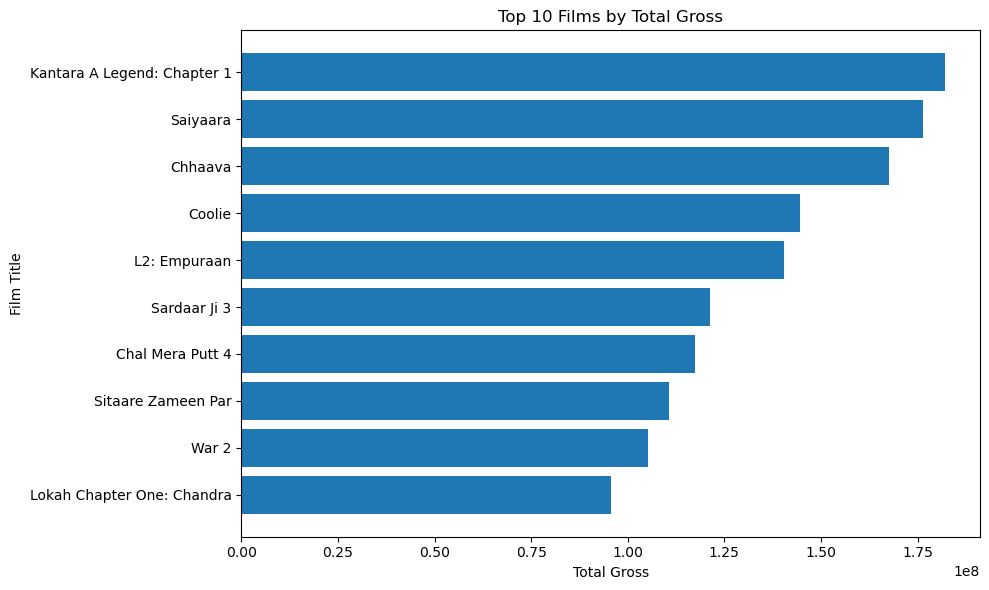

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Top 10 Films by Total Gross'}, xlabel='Total Gross', ylabel='Film Title'>)

In [106]:
from visualization.week1_sales_overview import plot_top10_films_by_total_gross

plot_top10_films_by_total_gross(
    top10_films,
    save_dir="visualization",
    show=True
)

In [107]:
list(sales.columns)
sales.dtypes

numero_film_id         int64
actual_sales_date     object
state                 object
city                  object
theatre_name          object
gross_today          float64
dtype: object

In [108]:
sales = flatten_sales_json(df_raw)
print("sales shape:", sales.shape)
sales.dtypes

sales shape: (65947, 6)


numero_film_id         int64
actual_sales_date     object
state                 object
city                  object
theatre_name          object
gross_today          float64
dtype: object

In [109]:
import pandas as pd  # just in case

sales['actual_sales_date'] = pd.to_datetime(
    sales['actual_sales_date'],
    errors='coerce'
)

print(sales['actual_sales_date'].dtype)
sales[['actual_sales_date']].head()

datetime64[ns]


,actual_sales_date
0,2025-02-20
1,2025-02-21
2,2025-02-22
3,2025-02-23
4,2025-02-24


In [110]:
sales['year_month'] = (
    sales['actual_sales_date']
      .dt.to_period('M')
      .astype(str)
)

sales[['actual_sales_date', 'year_month']].head()

,actual_sales_date,year_month
0,2025-02-20,2025-02
1,2025-02-21,2025-02
2,2025-02-22,2025-02
3,2025-02-23,2025-02
4,2025-02-24,2025-02


In [111]:
monthly_gross = (
    sales
      .groupby('year_month', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'total_gross'})
      .sort_values('year_month')
)

monthly_gross.head()

,year_month,total_gross
0,2025-01,176090163.0
1,2025-02,264447842.0
2,2025-03,275733497.0
3,2025-04,280124422.0
4,2025-05,242751283.0


In [112]:
best_month = monthly_gross.loc[monthly_gross['total_gross'].idxmax()]
worst_month = monthly_gross.loc[monthly_gross['total_gross'].idxmin()]

print("Highest month:", best_month['year_month'], "gross:", best_month['total_gross'])
print("Lowest month: ", worst_month['year_month'], "gross:", worst_month['total_gross'])

Highest month: 2025-08 gross: 592536648.0
Lowest month:  2025-11 gross: 44415346.0


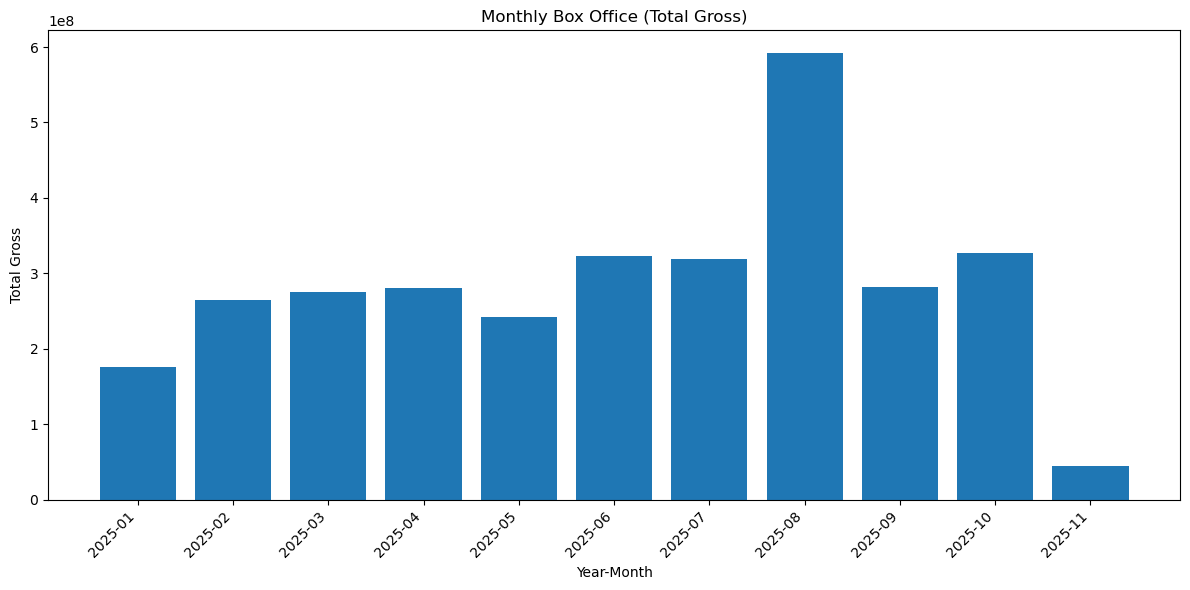

In [113]:
plt.figure(figsize=(12, 6))

plt.bar(monthly_gross['year_month'], monthly_gross['total_gross'])

plt.xlabel("Year-Month")
plt.ylabel("Total Gross")
plt.title("Monthly Box Office (Total Gross)")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [114]:
top_films = (
    film_totals_with_titles
      .sort_values('total_gross', ascending=False)
      .head(5)
)

top_films[['numero_film_id', 'title', 'total_gross']]

,numero_film_id,title,total_gross
91,85118,Kantara A Legend: Chapter 1,182044184.0
68,82496,Saiyaara,176392024.0
30,76895,Chhaava,167509548.0
73,83671,Coolie,144641071.0
41,78916,L2: Empuraan,140466294.0


In [115]:
target_id = int(top_films.iloc[0]['numero_film_id'])
target_title = top_films.iloc[0]['title']

print("Analysing film:", target_id, "-", target_title)

Analysing film: 85118 - Kantara A Legend: Chapter 1


In [116]:
film_daily = (
    sales[sales['numero_film_id'] == target_id]
      .groupby('actual_sales_date', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'daily_gross'})
      .sort_values('actual_sales_date')
)

film_daily.head()

,actual_sales_date,daily_gross
0,2025-10-02,11490629.0
1,2025-10-03,16845123.0
2,2025-10-04,17033246.0
3,2025-10-05,16757161.0
4,2025-10-06,13442135.0


In [117]:
first_date = film_daily['actual_sales_date'].min()
film_daily['days_since_start'] = (
    film_daily['actual_sales_date'] - first_date
).dt.days

film_daily.head()

,actual_sales_date,daily_gross,days_since_start
0,2025-10-02,11490629.0,0
1,2025-10-03,16845123.0,1
2,2025-10-04,17033246.0,2
3,2025-10-05,16757161.0,3
4,2025-10-06,13442135.0,4


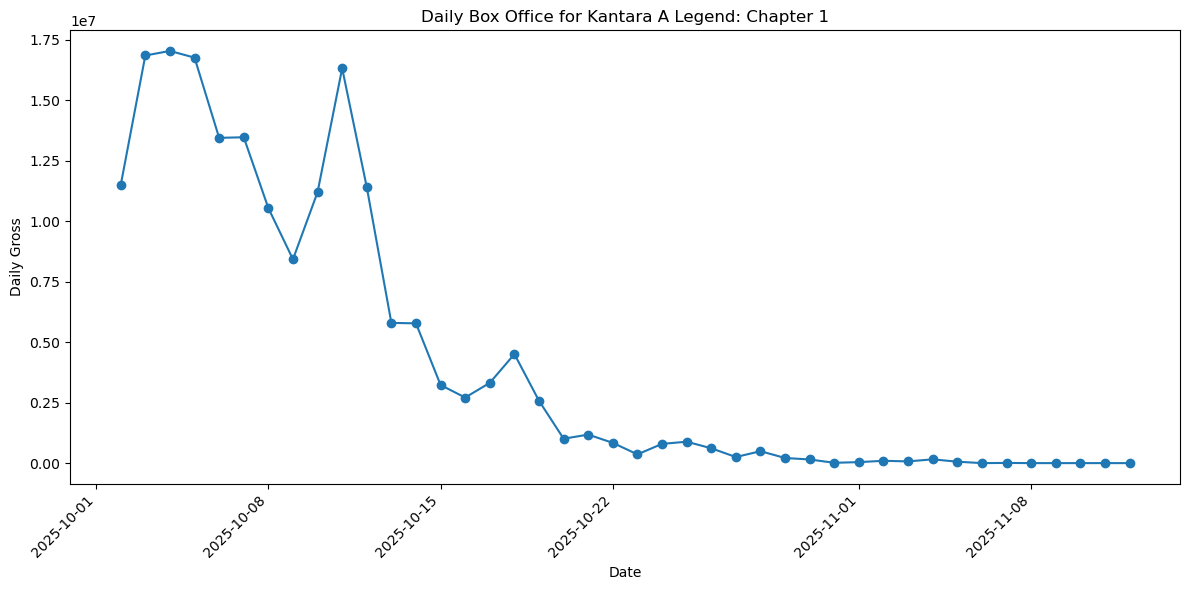

In [118]:
plt.figure(figsize=(12, 6))

plt.plot(
    film_daily['actual_sales_date'],
    film_daily['daily_gross'],
    marker='o'
)

plt.xlabel("Date")
plt.ylabel("Daily Gross")
plt.title(f"Daily Box Office for {target_title}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [119]:
sales['actual_sales_date'] = pd.to_datetime(
    sales['actual_sales_date'],
    errors='coerce'
)

sales['gross_today'] = pd.to_numeric(
    sales['gross_today'],
    errors='coerce'
)

In [120]:
sales['weekday'] = sales['actual_sales_date'].dt.day_name()     # "Monday", "Tuesday", ...
sales['weekday_index'] = sales['actual_sales_date'].dt.dayofweek  # Monday=0, Sunday=6

sales[['actual_sales_date', 'weekday', 'weekday_index']].head(10)

,actual_sales_date,weekday,weekday_index
0,2025-02-20,Thursday,3
1,2025-02-21,Friday,4
2,2025-02-22,Saturday,5
3,2025-02-23,Sunday,6
4,2025-02-24,Monday,0
5,2025-02-25,Tuesday,1
6,2025-02-26,Wednesday,2
7,2025-02-20,Thursday,3
8,2025-02-21,Friday,4
9,2025-02-22,Saturday,5


In [121]:
weekday_totals = (
    sales
      .groupby(['weekday_index', 'weekday'], as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'total_gross'})
      .sort_values('weekday_index')
)

weekday_totals

,weekday_index,weekday,total_gross
0,0,Monday,274945156.0
1,1,Tuesday,303765330.0
2,2,Wednesday,185000743.0
3,3,Thursday,394554646.0
4,4,Friday,636121711.0
5,5,Saturday,768254709.0
6,6,Sunday,564228949.0


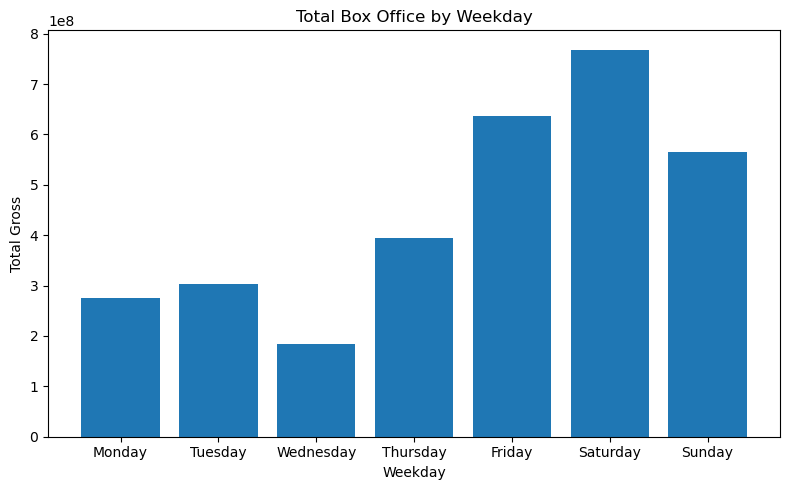

In [122]:
plt.figure(figsize=(8, 5))

plt.bar(weekday_totals['weekday'], weekday_totals['total_gross'])

plt.xlabel("Weekday")
plt.ylabel("Total Gross")
plt.title("Total Box Office by Weekday")

plt.tight_layout()
plt.show()

In [123]:
film_totals_with_titles.head()
film_totals_with_titles.columns

Index(['numero_film_id', 'total_gross', 'title'], dtype='object')

In [124]:
indian_titles = pd.read_sql(
    """
    SELECT title, distributor
    FROM indian_titles;
    """,
    conn
)

indian_titles.head()

,title,distributor
0,Kantara A Legend: Chapter 1,Zstars Entertainment
1,Saiyaara,Mindblowing
2,Chhaava,Mindblowing
3,Coolie,Tolly Movies
4,L2: Empuraan,Cyber Systems


In [125]:
films_with_dist = film_totals_with_titles.merge(
    indian_titles,
    on='title',
    how='left'
)

films_with_dist.head()

,numero_film_id,total_gross,title,distributor
0,48137,7163467.0,Noah's Ark,NaN
1,63815,6146995.0,Narivetta,Spectrum Talkies
2,64826,9748892.0,The Diplomat,Forum Distribution
3,66112,5045325.0,Bazooka,Wanderlust Films
4,68343,5383739.0,Emergency,Zee Studios


In [126]:
dist_totals = (
    films_with_dist
      .dropna(subset=['distributor'])          # ignore films with no distributor
      .groupby('distributor', as_index=False)['total_gross']
      .sum()
      .rename(columns={'total_gross': 'dist_total_gross'})
      .sort_values('dist_total_gross', ascending=False)
)

dist_totals.head()

,distributor,dist_total_gross
3,Mindblowing,846236394.0
1,Forum Distribution,458183666.0
7,Tolly Movies,411821712.0
0,Cyber Systems,394466536.0
2,Home Screen Entertainment,215413384.0


In [127]:
top_dists = dist_totals.head(10)
top_dists

,distributor,dist_total_gross
3,Mindblowing,846236394.0
1,Forum Distribution,458183666.0
7,Tolly Movies,411821712.0
0,Cyber Systems,394466536.0
2,Home Screen Entertainment,215413384.0
12,Zstars Entertainment,210804260.0
10,White Hill,165123939.0
4,Moviegoers Entertainment,145331031.0
9,Wanderlust Films,120813485.0
11,Zee Studios,65078800.0


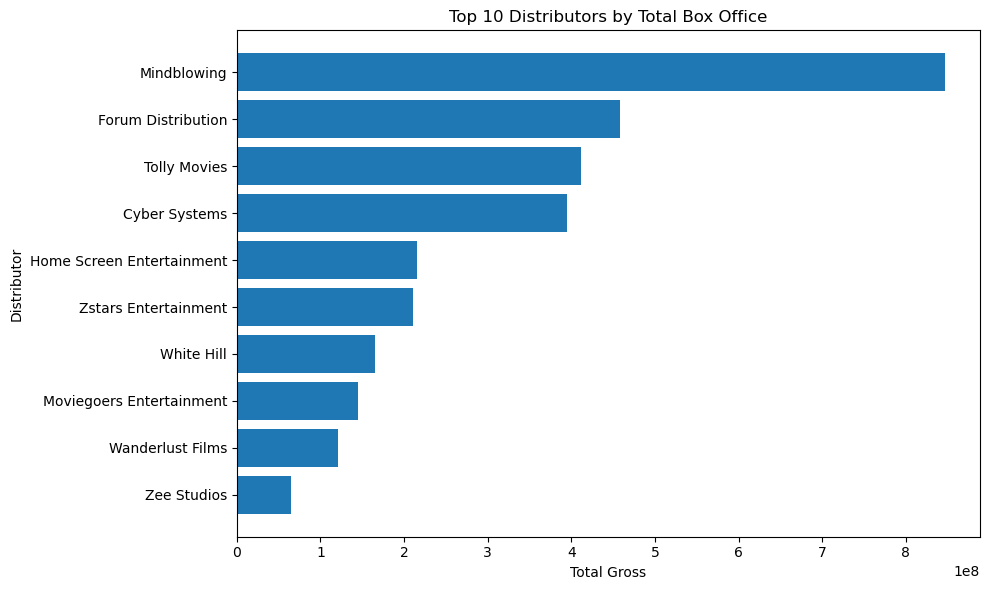

In [128]:
plt.figure(figsize=(10, 6))

plt.barh(top_dists['distributor'], top_dists['dist_total_gross'])

plt.xlabel("Total Gross")
plt.ylabel("Distributor")
plt.title("Top 10 Distributors by Total Box Office")

plt.gca().invert_yaxis()   # biggest at top
plt.tight_layout()
plt.show()

I built this chart by aggregating daily gross to film-level totals, then joining film titles with their distributors and summing total gross per distributor. The chart shows that Mindblowing contributes the largest share of box office revenue, almost twice that of the next largest distributor, indicating a highly concentrated market where a few distributors dominate. I chose this chart because it directly answers a key business question—who our most valuable distributor partners are—and it uses the structure of the dataset correctly, aggregating from daily cinema-level sales up to distributor-level totals

## This Week Focus

In [129]:
df_raw = pd.read_sql(
    "SELECT numero_film_id, raw_json FROM sales_raw_data;",
    conn
)

print("df_raw shape:", df_raw.shape)
df_raw.head()

df_raw shape: (100, 2)


,numero_film_id,raw_json
0,48137,"{""2025-02-20"": {""rows"": [{""boxOffice"": {""day1""..."
1,63815,"{""2025-05-22"": {""rows"": [{""boxOffice"": {""day1""..."
2,64826,"{""2025-03-13"": {""rows"": [{""boxOffice"": {""day1""..."
3,66112,"{""2025-04-10"": {""rows"": [{""boxOffice"": {""day1""..."
4,68343,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."


In [131]:
def flatten_sales_json(df_raw: pd.DataFrame) -> pd.DataFrame:
    """
    Loop over all films in df_raw, flatten each one
    using flatten_one_film, then concatenate the results.
    """
    all_frames = []

    for _, row in df_raw.iterrows():
        film_id = int(row['numero_film_id'])
        raw = row['raw_json']

        df_one = flatten_one_film(raw, film_id)

        if not df_one.empty:
            all_frames.append(df_one)

    if all_frames:
        result = pd.concat(all_frames, ignore_index=True)
    else:
        result = pd.DataFrame(
            columns=["numero_film_id", "actual_sales_date",
                     "state", "city", "theatre_name", "gross_today"]
        )

    return result

In [132]:
sales = flatten_sales_json(df_raw)
print("sales shape:", sales.shape)
sales.head()

sales['actual_sales_date'] = pd.to_datetime(sales['actual_sales_date'], errors='coerce')
sales['gross_today'] = pd.to_numeric(sales['gross_today'], errors='coerce')

sales.dtypes

sales shape: (65947, 6)


numero_film_id                int64
actual_sales_date    datetime64[ns]
state                        object
city                         object
theatre_name                 object
gross_today                 float64
dtype: object

In [133]:
state_totals = (
    sales
      .groupby('state', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'drill_down_state_gross'})
      .sort_values('drill_down_state_gross', ascending=False)
)

state_totals #1.22bil

,state,drill_down_state_gross
4,Victoria (inc TAS),1.219540e+09
0,New South Wales (inc ACT),9.987149e+08
2,Queensland,3.594744e+08
5,Western Australia,2.919676e+08
3,South Australia,2.320876e+08
1,Northern Territory,2.508670e+07


In [134]:
top_state = state_totals.iloc[0]['state']
print("Top state:", top_state)

Top state: Victoria (inc TAS)


In [135]:
state_sales = sales[sales['state'] == top_state]

city_totals = (
    state_sales
      .groupby('city', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'drill_down_city_gross'})
      .sort_values('drill_down_city_gross', ascending=False)
)

city_totals #473 mil

,city,drill_down_city_gross
19,West Melbourne,473075918.0
15,South East Melbourne,295602124.0
2,Central Inner Melbourne,120206842.0
10,North East Melbourne,100542920.0
13,Outer East Melbourne,92946142.0
11,North West Melbourne,49857710.0
4,Hobart,17722491.0
3,Geelong,15298760.0
7,Inner South Melbourne,10029801.0
9,Mornington Peninsula,9420997.0


In [136]:
top_city = city_totals.iloc[0]['city']
print("Top city in", top_state, ":", top_city)

Top city in Victoria (inc TAS) : West Melbourne


In [137]:
city_sales = state_sales[state_sales['city'] == top_city]

cinema_totals = (
    city_sales
      .groupby('theatre_name', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'cinema_gross'})
)

city_total_gross = cinema_totals['cinema_gross'].sum() #total
city_avg_gross = cinema_totals['cinema_gross'].mean() #avg


cinema_totals['share_of_city_pct'] = (
    cinema_totals['cinema_gross'] / city_total_gross * 100
)

cinema_totals['vs_city_avg_pct'] = (
    (cinema_totals['cinema_gross'] - city_avg_gross) / city_avg_gross * 100
) # % vs average cinema

cinema_totals = cinema_totals.sort_values('cinema_gross', ascending=False)

cinema_totals.head(10) #209 mil

,theatre_name,cinema_gross,share_of_city_pct,vs_city_avg_pct
3,Sunshine 20,209822774.0,44.352876,210.470130
5,Werribee 12,130211836.0,27.524512,92.671581
0,Highpoint 18,86432616.0,18.270348,27.892435
4,Watergardens 8,46104947.0,9.745782,-31.779527
1,Melton 5,401545.0,0.084880,-99.405843
2,Millers Junction 6,56100.0,0.011859,-99.916990
6,Yarraville Sun Theatre 8,46100.0,0.009745,-99.931787


In [138]:
cinema_global = (
    sales
      .groupby(['state', 'city', 'theatre_name'], as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'drill_up_whole_cinema_gross'})
      .sort_values('drill_up_whole_cinema_gross', ascending=False)
)

cinema_global.head(10) #272.38 million

,state,city,theatre_name,drill_up_whole_cinema_gross
68,New South Wales (inc ACT),West and Blue Mountains,Blacktown 10,272377817.0
202,Victoria (inc TAS),West Melbourne,Sunshine 20,209822774.0
54,New South Wales (inc ACT),Parramatta & Ryde,Parramatta 11,186267643.0
204,Victoria (inc TAS),West Melbourne,Werribee 12,130211836.0
216,Western Australia,Perth - South East,Carousel 14,127762193.0
190,Victoria (inc TAS),South East Melbourne,Chadstone 13,120959042.0
92,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,117022392.0
192,Victoria (inc TAS),South East Melbourne,Fountain Gate 14,116249483.0
137,South Australia,Adelaide - West,Hoyts Arndale 8,100301966.0
147,Victoria (inc TAS),Central Inner Melbourne,Docklands 8,87963587.0


In [139]:
titles = pd.read_sql(
    "SELECT * FROM film_metadata;",
    conn
)

titles.head()

,numero_film_id,title
0,48137,Noah's Ark
1,63815,Narivetta
2,64826,The Diplomat
3,66112,Bazooka
4,68343,Emergency


In [140]:
dist_info = pd.read_sql(
    "SELECT title, distributor FROM indian_titles;",
    conn
)

dist_info

,title,distributor
0,Kantara A Legend: Chapter 1,Zstars Entertainment
1,Saiyaara,Mindblowing
2,Chhaava,Mindblowing
3,Coolie,Tolly Movies
4,L2: Empuraan,Cyber Systems
...,...,...
209,Andaaz 2,Mindblowing
210,Mithya,Zstars Entertainment
211,Apoorva Puthranmaar,Cyber Systems
212,Paradha,Tolly Movies


In [141]:
titles_with_dist = titles.merge(
    dist_info,
    on='title',
    how='left'
)

titles_with_dist.head()

,numero_film_id,title,distributor
0,48137,Noah's Ark,NaN
1,63815,Narivetta,Spectrum Talkies
2,64826,The Diplomat,Forum Distribution
3,66112,Bazooka,Wanderlust Films
4,68343,Emergency,Zee Studios


In [142]:
sales_with_dist = sales.merge(
    titles_with_dist[['numero_film_id', 'distributor']],
    on='numero_film_id',
    how='left'
)

sales_with_dist.head()

,numero_film_id,actual_sales_date,state,city,theatre_name,gross_today,distributor
0,48137,2025-02-20,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,9701.0,NaN
1,48137,2025-02-21,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,9952.0,NaN
2,48137,2025-02-22,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,63552.0,NaN
3,48137,2025-02-23,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,48450.0,NaN
4,48137,2025-02-24,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,2200.0,NaN


In [143]:
dist_state = (
    sales_with_dist
      .groupby(['distributor', 'state'], as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'drill_down_dist_state_gross'})
      .sort_values(['distributor', 'drill_down_dist_state_gross'], ascending=[True, False])
)

dist_state.head(10)

,distributor,state,drill_down_dist_state_gross
4,Cyber Systems,Victoria (inc TAS),140023663.0
0,Cyber Systems,New South Wales (inc ACT),113151293.0
2,Cyber Systems,Queensland,64983508.0
5,Cyber Systems,Western Australia,45221007.0
3,Cyber Systems,South Australia,25244402.0
1,Cyber Systems,Northern Territory,5842663.0
10,Forum Distribution,Victoria (inc TAS),191452576.0
6,Forum Distribution,New South Wales (inc ACT),130901984.0
8,Forum Distribution,Queensland,50661608.0
9,Forum Distribution,South Australia,41378193.0


In [144]:
dist_totals = (
    sales_with_dist[~sales_with_dist['distributor'].isna()]
      .groupby('distributor', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'gross_per_dis'})
      .sort_values('gross_per_dis', ascending=False)
)

dist_totals.head(5) #846 mil

,distributor,gross_per_dis
3,Mindblowing,846236394.0
1,Forum Distribution,458183666.0
7,Tolly Movies,411821712.0
0,Cyber Systems,394466536.0
2,Home Screen Entertainment,215413384.0


In [145]:
sales_with_dist['distributor'].isna().sum()

2786

In [146]:
sales_with_dist['distributor'].isna().mean()

0.04224604606729646

In [147]:
missing_ids = (
    sales_with_dist.loc[sales_with_dist['distributor'].isna(), 'numero_film_id']
    .drop_duplicates()
    .head(10)
)

missing_ids

0        48137
10129    76167
30793    79787
Name: numero_film_id, dtype: int64

In [148]:
pd.read_sql(
    f"SELECT numero_film_id, title FROM film_metadata "
    f"WHERE numero_film_id IN ({','.join(str(x) for x in missing_ids)})",
    conn
)

,numero_film_id,title
0,48137,Noah's Ark
1,76167,Nikka Zaildar 4
2,79787,HIT: The Third Case


In [149]:
for table in tables:
    df = pd.read_sql(f"PRAGMA table_info({table});", conn)
    print(table)
    display(df)

film_metadata


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0


sales_raw_data


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,raw_json,TEXT,0,None,0


indian_titles


,cid,name,type,notnull,dflt_value,pk
0,0,rank,INTEGER,0,None,0
1,1,title,TEXT,0,None,0
2,2,distributor,TEXT,0,None,0
3,3,release_date,TEXT,0,None,0
4,4,rating,TEXT,0,None,0
5,5,opening_screens,REAL,0,None,0
6,6,opening_screen_average,REAL,0,None,0
7,7,opening_weekend_total,REAL,0,None,0
8,8,opening_week_total,REAL,0,None,0
9,9,lifetime_total,REAL,0,None,0


In [150]:
df_raw = pd.read_sql("SELECT * FROM sales_raw_data LIMIT 1", conn)
sample = json.loads(df_raw['raw_json'][0])
sample

{'2025-02-20': {'rows': [{'boxOffice': {'day1': {'previousAdmissions': {},
      'today': 9701},
     'day2': {'previousAdmissions': {}, 'today': 9952, 'yesterday': 9701},
     'day3': {'previousAdmissions': {}, 'today': 63552, 'yesterday': 9952},
     'day4': {'previousAdmissions': {}, 'today': 48450, 'yesterday': 63552},
     'day5': {'previousAdmissions': {}, 'today': 2200, 'yesterday': 48450},
     'day6': {'previousAdmissions': {}, 'today': 6149, 'yesterday': 2200},
     'day7': {'previousAdmissions': {}, 'today': 6101, 'yesterday': 6149},
     'week': {'gross': 146105},
     'weekend': {'gross': 131655}},
    'circuit': 'Event',
    'circuitId': 4,
    'city': 'Parramatta & Ryde',
    'cityId': 246,
    'rank': 1,
    'region': 'Sydney',
    'regionId': 26,
    'release': {'cumulativeBoxOffice': 146105,
     'cumulativePaidAdmissions': 89,
     'thisWeekFilmCount': 24,
     'thisWeekRank': 13},
    'state': 'New South Wales (inc ACT)',
    'stateId': 2,
    'theatre': 'Macquarie 

In [151]:
records = []

for raw in df_raw['raw_json']:
    data = json.loads(raw)

    for date_key, content in data.items():
        for r in content.get('rows', []):
            box = r.get('boxOffice', {})
            w = box.get('week', {})
            
            records.append({
                'date': date_key,
                'theatre': r.get('theatre'),
                'city': r.get('city'),
                'region': r.get('region'),
                'state': r.get('state'),
                'week_gross': w.get('gross')
            })

flat = pd.DataFrame(records)
flat.head()

,date,theatre,city,region,state,week_gross
0,2025-02-20,Macquarie 16,Parramatta & Ryde,Sydney,New South Wales (inc ACT),146105.0
1,2025-02-20,Southland 16,Inner South Melbourne,Melbourne,Victoria (inc TAS),139544.0
2,2025-02-20,Sunshine 20,West Melbourne,Melbourne,Victoria (inc TAS),138381.0
3,2025-02-20,Fountain Gate 14,South East Melbourne,Melbourne,Victoria (inc TAS),90367.0
4,2025-02-20,Highpoint 18,West Melbourne,Melbourne,Victoria (inc TAS),89893.0


In [152]:
flat['date'].value_counts().sort_index()

date
2025-02-20    111
2025-02-27     83
2025-03-06     25
2025-03-13     13
2025-03-20      5
2025-03-27      3
2025-04-03      1
2025-04-10      4
2025-04-17      1
2025-08-14      1
Name: count, dtype: int64

In [153]:
flat['date'] = pd.to_datetime(flat['date'])

In [154]:
flat['year_week'] = flat['date'].dt.isocalendar().week
flat['year'] = flat['date'].dt.isocalendar().year

In [155]:
flat['year_week_id'] = flat['year'].astype(str) + '-W' + flat['year_week'].astype(str)

In [156]:
weekly = (
    flat.groupby(['theatre', 'city', 'region', 'state', 'year_week_id'])
        ['week_gross']
        .sum()
        .reset_index()
)
weekly

,theatre,city,region,state,year_week_id,week_gross
0,Airport West 8,North West Melbourne,Melbourne,Victoria (inc TAS),2025-W8,48504.0
1,Airport West 8,North West Melbourne,Melbourne,Victoria (inc TAS),2025-W9,5000.0
2,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W10,19900.0
3,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W11,20000.0
4,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W12,9200.0
...,...,...,...,...,...,...
242,Wodonga Bandiana Army Cinema 1,Hume,VIC Regional,Victoria (inc TAS),2025-W15,0.0
243,Yarraville Sun Theatre 8,West Melbourne,Melbourne,Victoria (inc TAS),2025-W8,46100.0
244,Yarraville Sun Theatre 8,West Melbourne,Melbourne,Victoria (inc TAS),2025-W9,0.0
245,Yeppoon Cinemas 6,Central Queensland,QLD Regional,Queensland,2025-W8,44640.0


In [157]:
weekly['year_week_id'].value_counts().sort_index()

year_week_id
2025-W10     25
2025-W11     13
2025-W12      5
2025-W13      3
2025-W14      1
2025-W15      4
2025-W16      1
2025-W33      1
2025-W8     111
2025-W9      83
Name: count, dtype: int64

In [158]:
weekly.groupby('theatre')['year_week_id'].nunique().sort_values(ascending=False)

theatre
Rockingham United 6           5
Boronia Metro 4               5
Morwell 8                     4
Rockingham 10                 4
Victoria Point 8              4
                             ..
Cronulla Hoyts 6              1
Mt. Druitt 8                  1
Mount Barker 8                1
Chatswood Westfield 6         1
Ipswich Limelight Cinema 8    1
Name: year_week_id, Length: 124, dtype: int64

In [159]:
valid_theatres = weekly.groupby('theatre')['year_week_id'] \
                       .nunique() \
                       .loc[lambda x: x >= 3] \
                       .index

weekly_filtered = weekly[weekly['theatre'].isin(valid_theatres)]
weekly_filtered

,theatre,city,region,state,year_week_id,week_gross
2,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W10,19900.0
3,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W11,20000.0
4,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W12,9200.0
17,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),2025-W10,29300.0
18,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),2025-W11,20900.0
...,...,...,...,...,...,...
205,Sunshine 20,West Melbourne,Melbourne,Victoria (inc TAS),2025-W9,3400.0
222,Victoria Point 8,Brisbane - East,Brisbane,Queensland,2025-W10,5400.0
223,Victoria Point 8,Brisbane - East,Brisbane,Queensland,2025-W11,24800.0
224,Victoria Point 8,Brisbane - East,Brisbane,Queensland,2025-W8,56201.0


In [160]:
stats = (
    weekly_filtered
        .groupby(['theatre', 'city', 'region', 'state'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

stats['cv'] = stats['std'] / stats['mean']
stats.head()

,theatre,city,region,state,mean,std,count,cv
0,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16366.666667,6206.716792,3,0.379229
1,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),20780.000000,7483.782466,5,0.360144
2,Carousel 14,Perth - South East,Perth,Western Australia,48948.333333,25827.323019,3,0.527645
3,Cowes Cultural Centre 1,Latrobe - Gippsland,VIC Regional,Victoria (inc TAS),20475.000000,14692.259867,4,0.717571
4,Esperance Fenwick Cinema 3,W.A - Outback South,WA Regional,Western Australia,26200.000000,22782.449385,3,0.869559


In [161]:
stats = (
    weekly_filtered
        .groupby(['theatre', 'city', 'region', 'state'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

stats['cv'] = stats['std'] / stats['mean']
stats

,theatre,city,region,state,mean,std,count,cv
0,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16366.666667,6206.716792,3,0.379229
1,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),20780.000000,7483.782466,5,0.360144
2,Carousel 14,Perth - South East,Perth,Western Australia,48948.333333,25827.323019,3,0.527645
3,Cowes Cultural Centre 1,Latrobe - Gippsland,VIC Regional,Victoria (inc TAS),20475.000000,14692.259867,4,0.717571
4,Esperance Fenwick Cinema 3,W.A - Outback South,WA Regional,Western Australia,26200.000000,22782.449385,3,0.869559
5,Garden City Mt. Gravatt 16,Brisbane - South,Brisbane,Queensland,59371.333333,24892.259848,3,0.419264
6,Gladstone Cinema 7,Central Queensland,QLD Regional,Queensland,24286.666667,21186.885881,3,0.872367
7,Hawthorne 4,Brisbane - Inner City,Brisbane,Queensland,23475.000000,10500.912659,4,0.447323
8,Horsham Centre Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16966.666667,9354.321639,3,0.551335
9,Knox 15,Outer East Melbourne,Melbourne,Victoria (inc TAS),34675.666667,19415.699455,3,0.559923


In [162]:
def classify(cv):
    if cv < 0.30:
        return 'Safer (Stable)'
    elif cv < 0.60:
        return 'Moderate'
    elif cv < 1.00:
        return 'Higher-Risk (Volatile)'
    else:
        return 'Highly Volatile'

stats['risk_category'] = stats['cv'].apply(classify)

In [163]:
stats.sort_values('cv')

,theatre,city,region,state,mean,std,count,cv,risk_category
13,Redbank 8,Ipswich Region,QLD Regional,Queensland,40026.250000,8782.240693,4,0.219412,Safer (Stable)
1,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),20780.000000,7483.782466,5,0.360144,Moderate
0,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16366.666667,6206.716792,3,0.379229,Moderate
5,Garden City Mt. Gravatt 16,Brisbane - South,Brisbane,Queensland,59371.333333,24892.259848,3,0.419264,Moderate
17,Stafford 10,Brisbane - North,Brisbane,Queensland,26899.000000,11394.327580,3,0.423597,Moderate
7,Hawthorne 4,Brisbane - Inner City,Brisbane,Queensland,23475.000000,10500.912659,4,0.447323,Moderate
14,Rockingham 10,Perth - South West,Perth,Western Australia,45550.000000,22322.111609,4,0.490057,Moderate
2,Carousel 14,Perth - South East,Perth,Western Australia,48948.333333,25827.323019,3,0.527645,Moderate
8,Horsham Centre Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16966.666667,9354.321639,3,0.551335,Moderate
9,Knox 15,Outer East Melbourne,Melbourne,Victoria (inc TAS),34675.666667,19415.699455,3,0.559923,Moderate


In [164]:
stats.head()
stats.columns

Index(['theatre', 'city', 'region', 'state', 'mean', 'std', 'count', 'cv',
       'risk_category'],
      dtype='object')

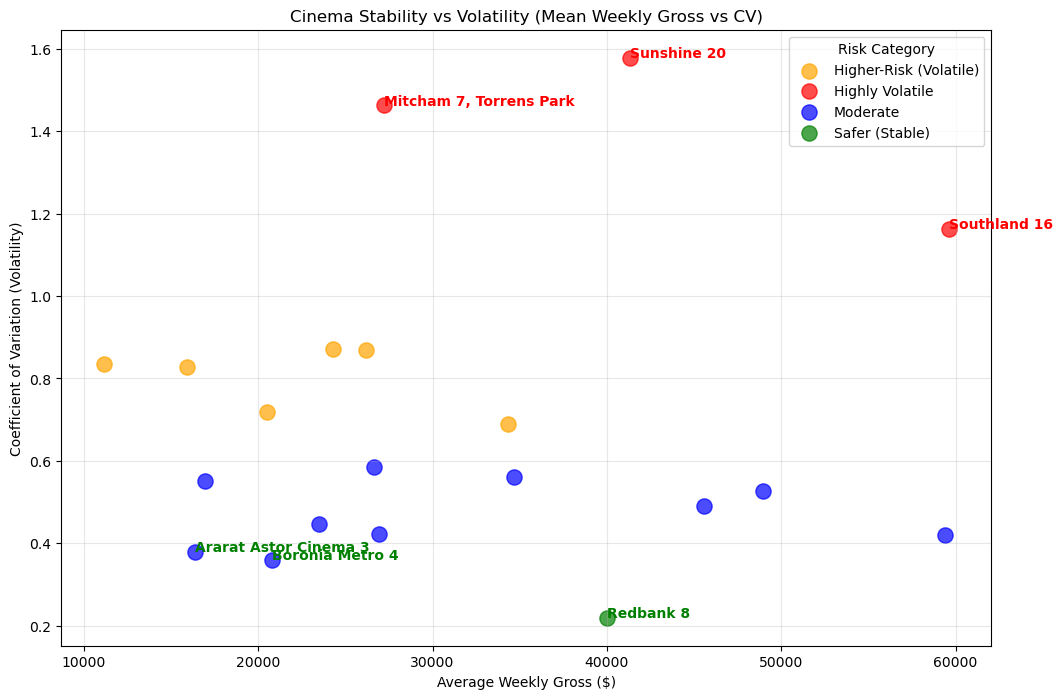

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Assign a color to each risk category
color_map = {
    'Safer (Stable)': 'green',
    'Moderate': 'blue',
    'Higher-Risk (Volatile)': 'orange',
    'Highly Volatile': 'red'
}

# Plot each category separately
for category, group in stats.groupby('risk_category'):
    plt.scatter(
        group['mean'],
        group['cv'],
        label=category,
        color=color_map.get(category, 'grey'),
        s=120,
        alpha=0.7
    )

# --- Label extreme points ---

# 3 lowest CV (most stable)
stable_points = stats.nsmallest(3, 'cv')

# 3 highest CV (most volatile)
volatile_points = stats.nlargest(3, 'cv')

for _, row in stable_points.iterrows():
    plt.text(
        row['mean'], row['cv'],
        row['theatre'],
        fontsize=10, fontweight='bold',
        color='green'
    )

for _, row in volatile_points.iterrows():
    plt.text(
        row['mean'], row['cv'],
        row['theatre'],
        fontsize=10, fontweight='bold',
        color='red'
    )

plt.title('Cinema Stability vs Volatility (Mean Weekly Gross vs CV)')
plt.xlabel('Average Weekly Gross ($)')
plt.ylabel('Coefficient of Variation (Volatility)')
plt.grid(alpha=0.3)
plt.legend(title='Risk Category')

plt.show()

In [166]:
weekly_plot = weekly_filtered.merge(
    stats[['theatre', 'risk_category']],
    on='theatre',
    how='left'
)

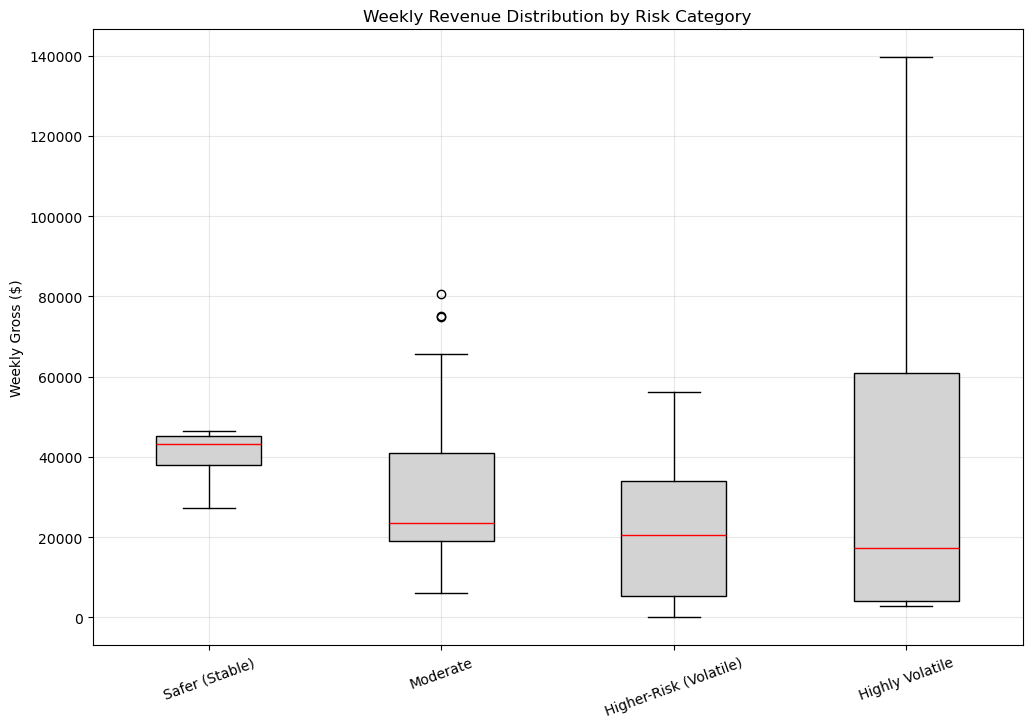

In [167]:
plt.figure(figsize=(12, 8))

# Get risk categories in a controlled order
categories = ['Safer (Stable)', 'Moderate', 'Higher-Risk (Volatile)', 'Highly Volatile']
data_to_plot = []

for cat in categories:
    values = weekly_plot.loc[weekly_plot['risk_category'] == cat, 'week_gross']
    if len(values) > 0:
        data_to_plot.append(values)
    else:
        data_to_plot.append([None])  # placeholder for empty groups

# Create the boxplot
plt.boxplot(
    data_to_plot,
    labels=categories,
    patch_artist=True,
    boxprops=dict(facecolor='lightgray'),
    medianprops=dict(color='red'),
    showfliers=True
)

plt.title('Weekly Revenue Distribution by Risk Category')
plt.ylabel('Weekly Gross ($)')
plt.grid(alpha=0.3)
plt.xticks(rotation=20)
plt.show()

In [168]:
region_stats = (
    weekly_filtered
        .groupby(['region'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

region_stats['cv'] = region_stats['std'] / region_stats['mean']
region_stats

,region,mean,std,count,cv
0,Adelaide,27232.333333,39828.571909,3,1.462547
1,Brisbane,35000.857143,21523.291966,14,0.614936
2,Melbourne,36800.000000,43332.425797,15,1.177512
3,Perth,38528.750000,21384.646825,12,0.555031
4,QLD Regional,33280.714286,16092.644321,7,0.483543
5,Sydney,11133.666667,9304.987928,3,0.835752
6,VIC Regional,17536.285714,10627.793717,14,0.606046
7,WA Regional,26200.000000,22782.449385,3,0.869559


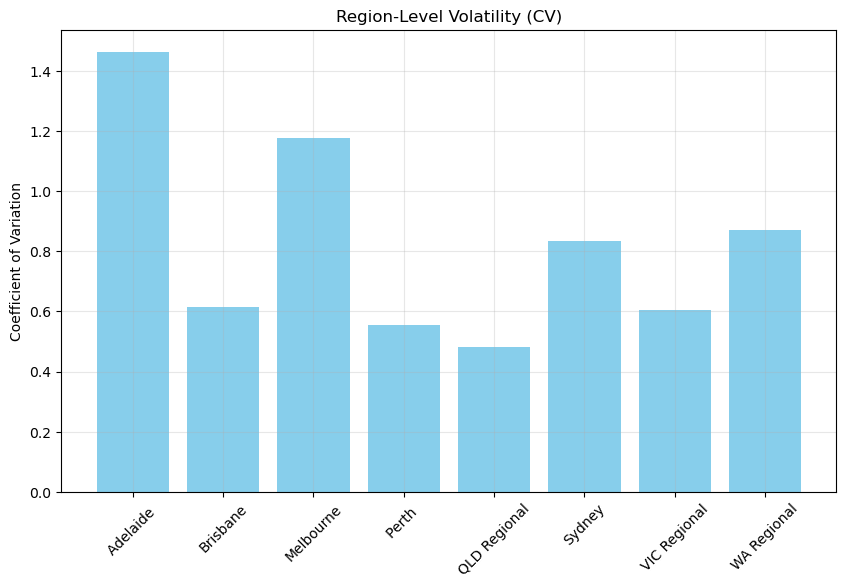

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(region_stats['region'], region_stats['cv'], color='skyblue')
plt.title('Region-Level Volatility (CV)')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

In [170]:
city_stats = (
    weekly_filtered
        .groupby(['city'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

city_stats['cv'] = city_stats['std'] / city_stats['mean']

# Sort by CV (high to low)
city_stats_sorted = city_stats.sort_values('cv', ascending=False)
city_stats_sorted

,city,mean,std,count,cv
15,West Melbourne,41295.750000,65178.177567,4,1.578327
0,Adelaide - South,27232.333333,39828.571909,3,1.462547
6,Inner South Melbourne,59630.000000,69368.661310,3,1.163318
5,Central Queensland,24286.666667,21186.885881,3,0.872367
14,W.A - Outback South,26200.000000,22782.449385,3,0.869559
13,South West Sydney,11133.666667,9304.987928,3,0.835752
8,Latrobe - Gippsland,18188.500000,13135.644886,8,0.722195
1,Brisbane - East,34325.250000,23669.046247,4,0.689552
12,Perth - South West,35055.555556,20192.703578,9,0.576020
10,Outer East Melbourne,25990.875000,13835.821422,8,0.532334


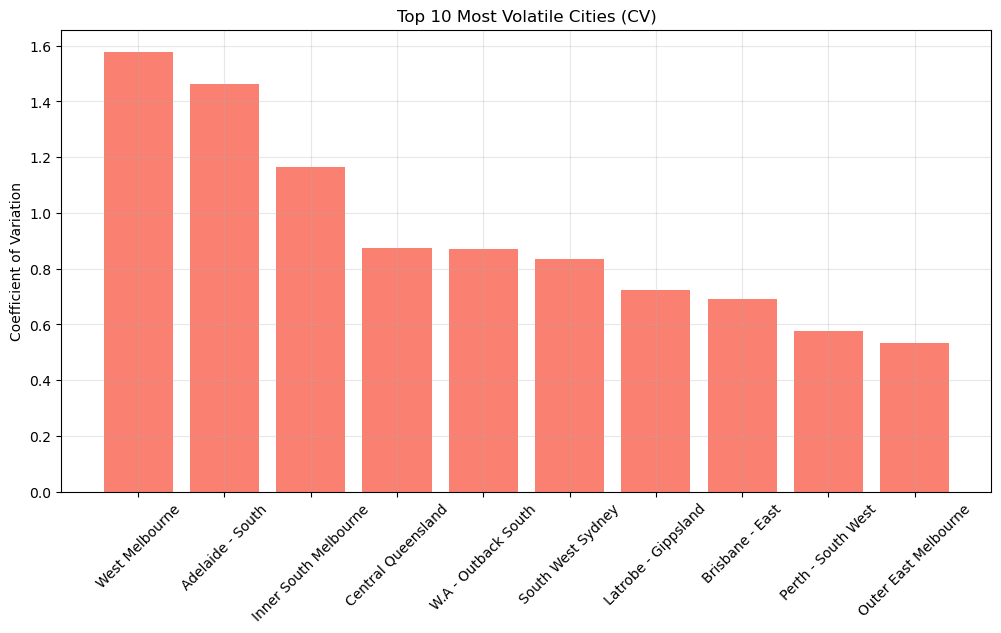

In [171]:
top10 = city_stats_sorted.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10['city'], top10['cv'], color='salmon')
plt.title('Top 10 Most Volatile Cities (CV)')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

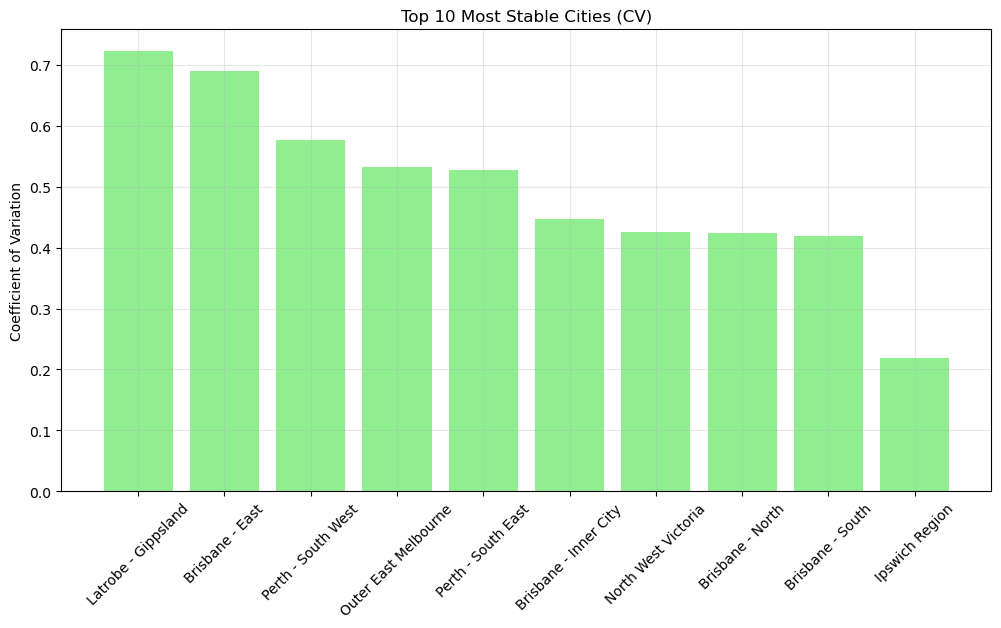

In [172]:
bottom10 = city_stats_sorted.tail(10)

plt.figure(figsize=(12, 6))
plt.bar(bottom10['city'], bottom10['cv'], color='lightgreen')
plt.title('Top 10 Most Stable Cities (CV)')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

In [173]:
import numpy as np

In [174]:
region_city_stats = (
    weekly_filtered
        .groupby(['region', 'city'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

region_city_stats['cv'] = region_city_stats['std'] / region_city_stats['mean']

# (optional but sensible) keep only region–city combos with at least 3 weeks of data
region_city_stats = region_city_stats[region_city_stats['count'] >= 3]

region_city_stats.head()

,region,city,mean,std,count,cv
0,Adelaide,Adelaide - South,27232.333333,39828.571909,3,1.462547
1,Brisbane,Brisbane - East,34325.250000,23669.046247,4,0.689552
2,Brisbane,Brisbane - Inner City,23475.000000,10500.912659,4,0.447323
3,Brisbane,Brisbane - North,26899.000000,11394.327580,3,0.423597
4,Brisbane,Brisbane - South,59371.333333,24892.259848,3,0.419264


In [175]:
import numpy as np
import pandas as pd

# 1) Ensure types are correct
sales_step = sales.copy()

# robust numeric cleanup (handles "1,234" style strings)
sales_step["gross_today"] = (
    sales_step["gross_today"]
      .astype(str)
      .str.replace(",", "", regex=False)
)
sales_step["gross_today"] = pd.to_numeric(sales_step["gross_today"], errors="coerce")

sales_step["actual_sales_date"] = pd.to_datetime(sales_step["actual_sales_date"], errors="coerce")

print("sales_step shape:", sales_step.shape)
print("gross_today null %:", sales_step["gross_today"].isna().mean().round(4))
print("actual_sales_date null %:", sales_step["actual_sales_date"].isna().mean().round(4))

# 2) Pull film titles (id -> title) and release dates (title -> release_date)
titles = pd.read_sql("SELECT numero_film_id, title FROM film_metadata;", conn)
indian_titles = pd.read_sql("SELECT title, release_date FROM indian_titles;", conn)

indian_titles["release_date"] = pd.to_datetime(indian_titles["release_date"], errors="coerce")

film_release = titles.merge(indian_titles, on="title", how="left")

print("\nfilm_release rows:", film_release.shape[0])
print("Missing release_date %:", film_release["release_date"].isna().mean().round(4))
display(film_release.head())

# 3) Merge release_date onto sales and compute relative film week
sales_w = sales_step.merge(
    film_release[["numero_film_id", "title", "release_date"]],
    on="numero_film_id",
    how="left"
)

# keep only valid dates
sales_w = sales_w.dropna(subset=["release_date", "actual_sales_date"])

sales_w["days_since_release"] = (sales_w["actual_sales_date"] - sales_w["release_date"]).dt.days

# remove pre-release records (if any)
sales_w = sales_w[sales_w["days_since_release"] >= 0].copy()

sales_w["film_week"] = (sales_w["days_since_release"] // 7) + 1

print("\nsales_w shape (after merge + filters):", sales_w.shape)
print("film_week min/max:", int(sales_w["film_week"].min()), int(sales_w["film_week"].max()))

display(
    sales_w[["numero_film_id", "title", "release_date", "actual_sales_date", "days_since_release", "film_week",
             "state", "city", "theatre_name", "gross_today"]]
    .head(10)
)

sales_step shape: (65947, 6)
gross_today null %: 0.2879
actual_sales_date null %: 0.0

film_release rows: 100
Missing release_date %: 0.03


,numero_film_id,title,release_date
0,48137,Noah's Ark,NaT
1,63815,Narivetta,2025-05-23
2,64826,The Diplomat,2025-03-14
3,66112,Bazooka,2025-04-10
4,68343,Emergency,2025-01-17



sales_w shape (after merge + filters): (58433, 10)
film_week min/max: 1 17


,numero_film_id,title,release_date,actual_sales_date,days_since_release,film_week,state,city,theatre_name,gross_today
1730,63815,Narivetta,2025-05-23,2025-05-23,0,1,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,1236823.0
1731,63815,Narivetta,2025-05-23,2025-05-24,1,1,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,47797.0
1732,63815,Narivetta,2025-05-23,2025-05-25,2,1,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,80491.0
1733,63815,Narivetta,2025-05-23,2025-05-26,3,1,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,38217.0
1734,63815,Narivetta,2025-05-23,2025-05-27,4,1,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,47684.0
1735,63815,Narivetta,2025-05-23,2025-05-28,5,1,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,24514.0
1737,63815,Narivetta,2025-05-23,2025-05-23,0,1,Western Australia,Perth - South East,Carousel 14,84964.0
1738,63815,Narivetta,2025-05-23,2025-05-24,1,1,Western Australia,Perth - South East,Carousel 14,112127.0
1739,63815,Narivetta,2025-05-23,2025-05-25,2,1,Western Australia,Perth - South East,Carousel 14,37983.0
1740,63815,Narivetta,2025-05-23,2025-05-26,3,1,Western Australia,Perth - South East,Carousel 14,40061.0


In [176]:
# Step 2: bucket weeks and aggregate by place

df = sales_w.copy()

# track missing gross, then impute to 0 for aggregation
df["gross_missing"] = df["gross_today"].isna()
df["gross_clean"] = df["gross_today"].fillna(0)

print("Rows:", df.shape[0])
print("Gross missing % (will be imputed to 0):", df["gross_missing"].mean().round(4))

# Week buckets
df["week_bucket"] = np.where(df["film_week"] <= 2, "W1_2", "W3plus")

# Aggregate at three levels
levels = {
    "state": ["state"],
    "city": ["state", "city"],
    "cinema": ["state", "city", "theatre_name"]
}

results = {}

for name, keys in levels.items():
    agg = (
        df.groupby(keys + ["week_bucket"], dropna=False)["gross_clean"]
          .sum()
          .reset_index()
    )
    pivot = (
        agg.pivot_table(index=keys, columns="week_bucket", values="gross_clean", fill_value=0)
           .reset_index()
    )

    # ensure both columns exist even if a bucket is absent
    if "W1_2" not in pivot.columns: pivot["W1_2"] = 0.0
    if "W3plus" not in pivot.columns: pivot["W3plus"] = 0.0

    pivot["total_gross"] = pivot["W1_2"] + pivot["W3plus"]
    pivot["early_share"] = np.where(pivot["total_gross"] > 0, pivot["W1_2"] / pivot["total_gross"], np.nan)

    # light filtering to reduce noise (keep only places with meaningful totals)
    # You can tighten later, but start simple:
    pivot_f = pivot[pivot["total_gross"] > 0].copy()

    results[name] = pivot_f

    print(f"\n=== Level: {name} ===")
    print("Rows:", pivot_f.shape[0])
    print("early_share summary:")
    display(pivot_f["early_share"].describe())

    # Show top-grossing places (sanity check)
    display(pivot_f.sort_values("total_gross", ascending=False).head(10))

# Save for next steps
state_timing = results["state"]
city_timing = results["city"]
cinema_timing = results["cinema"]

Rows: 58433
Gross missing % (will be imputed to 0): 0.2313

=== Level: state ===
Rows: 6
early_share summary:


count    6.000000
mean     0.928985
std      0.015243
min      0.911077
25%      0.915777
50%      0.931296
75%      0.938461
max      0.948789
Name: early_share, dtype: float64

week_bucket,state,W1_2,W3plus,total_gross,early_share
4,Victoria (inc TAS),1.090590e+09,106443966.0,1.197034e+09,0.911077
0,New South Wales (inc ACT),8.980224e+08,87081334.0,9.851038e+08,0.911602
2,Queensland,3.352370e+08,18094421.0,3.533314e+08,0.948789
5,Western Australia,2.685097e+08,18884855.0,2.873946e+08,0.934289
3,South Australia,2.117390e+08,16353578.0,2.280926e+08,0.928303
1,Northern Territory,2.322525e+07,1486357.0,2.471160e+07,0.939852



=== Level: city ===
Rows: 71
early_share summary:


count    71.000000
mean      0.921653
std       0.110452
min       0.353171
25%       0.917374
50%       0.946605
75%       0.975171
max       1.000000
Name: early_share, dtype: float64

week_bucket,state,city,W1_2,W3plus,total_gross,early_share
62,Victoria (inc TAS),West Melbourne,411416494.0,52146619.0,463563113.0,0.887509
20,New South Wales (inc ACT),West and Blue Mountains,270812065.0,36149429.0,306961494.0,0.882235
58,Victoria (inc TAS),South East Melbourne,267356578.0,24296989.0,291653567.0,0.916692
16,New South Wales (inc ACT),Parramatta & Ryde,212990523.0,17401536.0,230392059.0,0.924470
26,Queensland,Brisbane - South,155100002.0,10857651.0,165957653.0,0.934576
67,Western Australia,Perth - South East,137636062.0,7784048.0,145420110.0,0.946472
18,New South Wales (inc ACT),South West Sydney,112559914.0,10157600.0,122717514.0,0.917228
46,Victoria (inc TAS),Central Inner Melbourne,110788059.0,6525451.0,117313510.0,0.944376
41,South Australia,Adelaide - West,94619896.0,4292218.0,98912114.0,0.956606
53,Victoria (inc TAS),North East Melbourne,91089477.0,7703548.0,98793025.0,0.922023



=== Level: cinema ===
Rows: 195
early_share summary:


count    195.000000
mean       0.911551
std        0.187717
min        0.000000
25%        0.917361
50%        0.963167
75%        1.000000
max        1.000000
Name: early_share, dtype: float64

week_bucket,state,city,theatre_name,W1_2,W3plus,total_gross,early_share
62,New South Wales (inc ACT),West and Blue Mountains,Blacktown 10,233521844.0,33834699.0,267356543.0,0.873447
177,Victoria (inc TAS),West Melbourne,Sunshine 20,177638080.0,28901473.0,206539553.0,0.860068
49,New South Wales (inc ACT),Parramatta & Ryde,Parramatta 11,171047864.0,13299749.0,184347613.0,0.927855
179,Victoria (inc TAS),West Melbourne,Werribee 12,112749238.0,15087902.0,127837140.0,0.881976
189,Western Australia,Perth - South East,Carousel 14,118819492.0,6931881.0,125751373.0,0.944876
166,Victoria (inc TAS),South East Melbourne,Chadstone 13,111660283.0,6649027.0,118309310.0,0.943800
168,Victoria (inc TAS),South East Melbourne,Fountain Gate 14,105226418.0,9860380.0,115086798.0,0.914322
83,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,106002790.0,8938946.0,114941736.0,0.922231
119,South Australia,Adelaide - West,Hoyts Arndale 8,94601396.0,4292218.0,98893614.0,0.956598
128,Victoria (inc TAS),Central Inner Melbourne,Docklands 8,81423232.0,3901724.0,85324956.0,0.954272


In [177]:
import numpy as np

def classify_places(df, level_name, keys, min_total_quantile=0.50, early_q=0.75, slow_q=0.25):
    out = df.copy()
    out["late_share"] = np.where(out["total_gross"] > 0, out["W3plus"] / out["total_gross"], np.nan)

    # Eligibility: exclude very small places (noise)
    min_total = out["total_gross"].quantile(min_total_quantile)
    eligible = out[out["total_gross"] >= min_total].copy()

    # Data-driven thresholds (so we still get a "slow-burn" segment even if overall is front-loaded)
    early_thr = eligible["early_share"].quantile(early_q)
    slow_thr  = eligible["early_share"].quantile(slow_q)

    eligible["timing_class"] = np.select(
        [
            eligible["early_share"] >= early_thr,
            eligible["early_share"] <= slow_thr
        ],
        ["EARLY_ADOPTER", "SLOW_BURN"],
        default="BALANCED"
    )

    print(f"\n=== {level_name.upper()} CLASSIFICATION ===")
    print("Eligibility min_total_gross:", f"{min_total:,.0f}")
    print("Early threshold (>=):", round(float(early_thr), 4))
    print("Slow threshold (<=):", round(float(slow_thr), 4))
    print("\nCounts:")
    display(eligible["timing_class"].value_counts())

    # Show representative examples
    show_cols = keys + ["W1_2", "W3plus", "total_gross", "early_share", "late_share", "timing_class"]

    print("\nTop EARLY_ADOPTER (by total_gross):")
    display(
        eligible[eligible["timing_class"]=="EARLY_ADOPTER"]
        .sort_values("total_gross", ascending=False)
        .head(10)[show_cols]
    )

    print("\nTop SLOW_BURN (by W3plus):")
    display(
        eligible[eligible["timing_class"]=="SLOW_BURN"]
        .sort_values("W3plus", ascending=False)
        .head(10)[show_cols]
    )

    return eligible

state_classified  = classify_places(state_timing,  "state",  ["state"])
city_classified   = classify_places(city_timing,   "city",   ["state", "city"])
cinema_classified = classify_places(cinema_timing, "cinema", ["state", "city", "theatre_name"])


=== STATE CLASSIFICATION ===
Eligibility min_total_gross: 320,363,013
Early threshold (>=): 0.9302
Slow threshold (<=): 0.9113

Counts:


timing_class
BALANCED         1
EARLY_ADOPTER    1
SLOW_BURN        1
Name: count, dtype: int64


Top EARLY_ADOPTER (by total_gross):


week_bucket,state,W1_2,W3plus,total_gross,early_share,late_share,timing_class
2,Queensland,335237009.0,18094421.0,353331430.0,0.948789,0.051211,EARLY_ADOPTER



Top SLOW_BURN (by W3plus):


week_bucket,state,W1_2,W3plus,total_gross,early_share,late_share,timing_class
4,Victoria (inc TAS),1.090590e+09,106443966.0,1.197034e+09,0.911077,0.088923,SLOW_BURN



=== CITY CLASSIFICATION ===
Eligibility min_total_gross: 9,202,190
Early threshold (>=): 0.9576
Slow threshold (<=): 0.915

Counts:


timing_class
BALANCED         18
EARLY_ADOPTER     9
SLOW_BURN         9
Name: count, dtype: int64


Top EARLY_ADOPTER (by total_gross):


week_bucket,state,city,W1_2,W3plus,total_gross,early_share,late_share,timing_class
0,New South Wales (inc ACT),Canberra,78698553.0,3011677.0,81710230.0,0.963142,0.036858,EARLY_ADOPTER
30,Queensland,Gold Coast,23575343.0,645944.0,24221287.0,0.973332,0.026668,EARLY_ADOPTER
48,Victoria (inc TAS),Hobart,16859883.0,733767.0,17593650.0,0.958294,0.041706,EARLY_ADOPTER
47,Victoria (inc TAS),Geelong,14655085.0,252485.0,14907570.0,0.983063,0.016937,EARLY_ADOPTER
68,Western Australia,Perth - South West,12013411.0,267777.0,12281188.0,0.978196,0.021804,EARLY_ADOPTER
11,New South Wales (inc ACT),Murray and Riverina,11135348.0,415954.0,11551302.0,0.963991,0.036009,EARLY_ADOPTER
8,New South Wales (inc ACT),Illawarra,11081860.0,142395.0,11224255.0,0.987314,0.012686,EARLY_ADOPTER
28,Queensland,Cairns Region,9900750.0,151735.0,10052485.0,0.984906,0.015094,EARLY_ADOPTER
52,Victoria (inc TAS),Mornington Peninsula,9071371.0,130819.0,9202190.0,0.985784,0.014216,EARLY_ADOPTER



Top SLOW_BURN (by W3plus):


week_bucket,state,city,W1_2,W3plus,total_gross,early_share,late_share,timing_class
62,Victoria (inc TAS),West Melbourne,411416494.0,52146619.0,463563113.0,0.887509,0.112491,SLOW_BURN
20,New South Wales (inc ACT),West and Blue Mountains,270812065.0,36149429.0,306961494.0,0.882235,0.117765,SLOW_BURN
56,Victoria (inc TAS),Outer East Melbourne,82715423.0,8905986.0,91621409.0,0.902796,0.097204,SLOW_BURN
39,South Australia,Adelaide - North,80857598.0,8650338.0,89507936.0,0.903357,0.096643,SLOW_BURN
9,New South Wales (inc ACT),Inner West,49012377.0,5968014.0,54980391.0,0.891452,0.108548,SLOW_BURN
6,New South Wales (inc ACT),Hills & Hawkesbury,42056419.0,4437563.0,46493982.0,0.904556,0.095444,SLOW_BURN
14,New South Wales (inc ACT),North Sydney - Hornsby,27813921.0,4286156.0,32100077.0,0.866475,0.133525,SLOW_BURN
65,Western Australia,Perth - North East,35326069.0,3672387.0,38998456.0,0.905833,0.094167,SLOW_BURN
19,New South Wales (inc ACT),Sutherland & St George,25282566.0,2506773.0,27789339.0,0.909794,0.090206,SLOW_BURN



=== CINEMA CLASSIFICATION ===
Eligibility min_total_gross: 2,516,261
Early threshold (>=): 0.9696
Slow threshold (<=): 0.917

Counts:


timing_class
BALANCED         48
EARLY_ADOPTER    25
SLOW_BURN        25
Name: count, dtype: int64


Top EARLY_ADOPTER (by total_gross):


week_bucket,state,city,theatre_name,W1_2,W3plus,total_gross,early_share,late_share,timing_class
4,New South Wales (inc ACT),Canberra,Woden 8,29858766.0,633688.0,30492454.0,0.979218,0.020782,EARLY_ADOPTER
137,Victoria (inc TAS),Geelong,Geelong 11,12675915.0,252485.0,12928400.0,0.980471,0.019529,EARLY_ADOPTER
131,Victoria (inc TAS),Central Inner Melbourne,Melbourne IMAX,9983484.0,0.0,9983484.0,1.000000,0.000000,EARLY_ADOPTER
147,Victoria (inc TAS),Mornington Peninsula,Frankston 12,9071371.0,130819.0,9202190.0,0.985784,0.014216,EARLY_ADOPTER
67,Northern Territory,Darwin,Palmerston 6,8268671.0,172763.0,8441434.0,0.979534,0.020466,EARLY_ADOPTER
105,Queensland,Toowoomba - Darling Downs,Toowoomba Strand 5,8131252.0,68037.0,8199289.0,0.991702,0.008298,EARLY_ADOPTER
103,Queensland,Sunshine Coast,Maroochydore 12,7888299.0,30403.0,7918702.0,0.996161,0.003839,EARLY_ADOPTER
29,New South Wales (inc ACT),Illawarra,Warrawong 6,7561671.0,142395.0,7704066.0,0.981517,0.018483,EARLY_ADOPTER
35,New South Wales (inc ACT),Murray and Riverina,Albury-Wodonga Regent 9,6970942.0,0.0,6970942.0,1.000000,0.000000,EARLY_ADOPTER
88,Queensland,Cairns Region,Cairns Central 6,6741114.0,151735.0,6892849.0,0.977987,0.022013,EARLY_ADOPTER



Top SLOW_BURN (by W3plus):


week_bucket,state,city,theatre_name,W1_2,W3plus,total_gross,early_share,late_share,timing_class
62,New South Wales (inc ACT),West and Blue Mountains,Blacktown 10,233521844.0,33834699.0,267356543.0,0.873447,0.126553,SLOW_BURN
177,Victoria (inc TAS),West Melbourne,Sunshine 20,177638080.0,28901473.0,206539553.0,0.860068,0.139932,SLOW_BURN
179,Victoria (inc TAS),West Melbourne,Werribee 12,112749238.0,15087902.0,127837140.0,0.881976,0.118024,SLOW_BURN
168,Victoria (inc TAS),South East Melbourne,Fountain Gate 14,105226418.0,9860380.0,115086798.0,0.914322,0.085678,SLOW_BURN
116,South Australia,Adelaide - North,Tea Tree Plaza 9,49434528.0,5975058.0,55409586.0,0.892166,0.107834,SLOW_BURN
31,New South Wales (inc ACT),Inner West,Burwood 12,48278777.0,5968014.0,54246791.0,0.889984,0.110016,SLOW_BURN
162,Victoria (inc TAS),Outer East Melbourne,Knox 15,60556813.0,5868582.0,66425395.0,0.911652,0.088348,SLOW_BURN
24,New South Wales (inc ACT),Hills & Hawkesbury,Castle Hill 15,40742784.0,4437563.0,45180347.0,0.901781,0.098219,SLOW_BURN
148,Victoria (inc TAS),North East Melbourne,Craigieburn United 8,33063448.0,4347250.0,37410698.0,0.883797,0.116203,SLOW_BURN
169,Victoria (inc TAS),South East Melbourne,M-City 6,24594324.0,4210761.0,28805085.0,0.853819,0.146181,SLOW_BURN


In [178]:
def build_wave_tables(df, keys):
    x = df.copy()

    # Priority scores (tunable but sensible defaults)
    x["priority_wave1"] = x["total_gross"] * x["early_share"]      # big + early
    x["priority_wave2"] = x["W3plus"]                               # late revenue potential

    wave1 = (
        x[x["timing_class"] == "EARLY_ADOPTER"]
        .sort_values(["priority_wave1", "total_gross"], ascending=False)
        .copy()
    )

    wave2 = (
        x[x["timing_class"] == "SLOW_BURN"]
        .sort_values(["priority_wave2", "W3plus"], ascending=False)
        .copy()
    )

    balanced = (
        x[x["timing_class"] == "BALANCED"]
        .sort_values("total_gross", ascending=False)
        .copy()
    )

    cols = keys + ["W1_2", "W3plus", "total_gross", "early_share", "late_share", "timing_class",
                   "priority_wave1", "priority_wave2"]

    return wave1[cols], wave2[cols], balanced[cols]

# Build wave tables
state_wave1, state_wave2, state_bal = build_wave_tables(state_classified, ["state"])
city_wave1, city_wave2, city_bal = build_wave_tables(city_classified, ["state", "city"])
cinema_wave1, cinema_wave2, cinema_bal = build_wave_tables(cinema_classified, ["state", "city", "theatre_name"])

print("STATE wave sizes:", len(state_wave1), len(state_wave2), len(state_bal))
print("CITY wave sizes:", len(city_wave1), len(city_wave2), len(city_bal))
print("CINEMA wave sizes:", len(cinema_wave1), len(cinema_wave2), len(cinema_bal))

print("\n--- CITY: Release first (Wave 1) ---")
display(city_wave1.head(15))

print("\n--- CITY: Release later (Wave 2) ---")
display(city_wave2.head(15))

print("\n--- CINEMA: Release first (Wave 1) ---")
display(cinema_wave1.head(15))

print("\n--- CINEMA: Release later (Wave 2) ---")
display(cinema_wave2.head(15))


STATE wave sizes: 1 1 1
CITY wave sizes: 9 9 18
CINEMA wave sizes: 25 25 48

--- CITY: Release first (Wave 1) ---


week_bucket,state,city,W1_2,W3plus,total_gross,early_share,late_share,timing_class,priority_wave1,priority_wave2
0,New South Wales (inc ACT),Canberra,78698553.0,3011677.0,81710230.0,0.963142,0.036858,EARLY_ADOPTER,78698553.0,3011677.0
30,Queensland,Gold Coast,23575343.0,645944.0,24221287.0,0.973332,0.026668,EARLY_ADOPTER,23575343.0,645944.0
48,Victoria (inc TAS),Hobart,16859883.0,733767.0,17593650.0,0.958294,0.041706,EARLY_ADOPTER,16859883.0,733767.0
47,Victoria (inc TAS),Geelong,14655085.0,252485.0,14907570.0,0.983063,0.016937,EARLY_ADOPTER,14655085.0,252485.0
68,Western Australia,Perth - South West,12013411.0,267777.0,12281188.0,0.978196,0.021804,EARLY_ADOPTER,12013411.0,267777.0
11,New South Wales (inc ACT),Murray and Riverina,11135348.0,415954.0,11551302.0,0.963991,0.036009,EARLY_ADOPTER,11135348.0,415954.0
8,New South Wales (inc ACT),Illawarra,11081860.0,142395.0,11224255.0,0.987314,0.012686,EARLY_ADOPTER,11081860.0,142395.0
28,Queensland,Cairns Region,9900750.0,151735.0,10052485.0,0.984906,0.015094,EARLY_ADOPTER,9900750.0,151735.0
52,Victoria (inc TAS),Mornington Peninsula,9071371.0,130819.0,9202190.0,0.985784,0.014216,EARLY_ADOPTER,9071371.0,130819.0



--- CITY: Release later (Wave 2) ---


week_bucket,state,city,W1_2,W3plus,total_gross,early_share,late_share,timing_class,priority_wave1,priority_wave2
62,Victoria (inc TAS),West Melbourne,411416494.0,52146619.0,463563113.0,0.887509,0.112491,SLOW_BURN,411416494.0,52146619.0
20,New South Wales (inc ACT),West and Blue Mountains,270812065.0,36149429.0,306961494.0,0.882235,0.117765,SLOW_BURN,270812065.0,36149429.0
56,Victoria (inc TAS),Outer East Melbourne,82715423.0,8905986.0,91621409.0,0.902796,0.097204,SLOW_BURN,82715423.0,8905986.0
39,South Australia,Adelaide - North,80857598.0,8650338.0,89507936.0,0.903357,0.096643,SLOW_BURN,80857598.0,8650338.0
9,New South Wales (inc ACT),Inner West,49012377.0,5968014.0,54980391.0,0.891452,0.108548,SLOW_BURN,49012377.0,5968014.0
6,New South Wales (inc ACT),Hills & Hawkesbury,42056419.0,4437563.0,46493982.0,0.904556,0.095444,SLOW_BURN,42056419.0,4437563.0
14,New South Wales (inc ACT),North Sydney - Hornsby,27813921.0,4286156.0,32100077.0,0.866475,0.133525,SLOW_BURN,27813921.0,4286156.0
65,Western Australia,Perth - North East,35326069.0,3672387.0,38998456.0,0.905833,0.094167,SLOW_BURN,35326069.0,3672387.0
19,New South Wales (inc ACT),Sutherland & St George,25282566.0,2506773.0,27789339.0,0.909794,0.090206,SLOW_BURN,25282566.0,2506773.0



--- CINEMA: Release first (Wave 1) ---


week_bucket,state,city,theatre_name,W1_2,W3plus,total_gross,early_share,late_share,timing_class,priority_wave1,priority_wave2
4,New South Wales (inc ACT),Canberra,Woden 8,29858766.0,633688.0,30492454.0,0.979218,0.020782,EARLY_ADOPTER,29858766.0,633688.0
137,Victoria (inc TAS),Geelong,Geelong 11,12675915.0,252485.0,12928400.0,0.980471,0.019529,EARLY_ADOPTER,12675915.0,252485.0
131,Victoria (inc TAS),Central Inner Melbourne,Melbourne IMAX,9983484.0,0.0,9983484.0,1.000000,0.000000,EARLY_ADOPTER,9983484.0,0.0
147,Victoria (inc TAS),Mornington Peninsula,Frankston 12,9071371.0,130819.0,9202190.0,0.985784,0.014216,EARLY_ADOPTER,9071371.0,130819.0
67,Northern Territory,Darwin,Palmerston 6,8268671.0,172763.0,8441434.0,0.979534,0.020466,EARLY_ADOPTER,8268671.0,172763.0
105,Queensland,Toowoomba - Darling Downs,Toowoomba Strand 5,8131252.0,68037.0,8199289.0,0.991702,0.008298,EARLY_ADOPTER,8131252.0,68037.0
103,Queensland,Sunshine Coast,Maroochydore 12,7888299.0,30403.0,7918702.0,0.996161,0.003839,EARLY_ADOPTER,7888299.0,30403.0
29,New South Wales (inc ACT),Illawarra,Warrawong 6,7561671.0,142395.0,7704066.0,0.981517,0.018483,EARLY_ADOPTER,7561671.0,142395.0
35,New South Wales (inc ACT),Murray and Riverina,Albury-Wodonga Regent 9,6970942.0,0.0,6970942.0,1.000000,0.000000,EARLY_ADOPTER,6970942.0,0.0
16,New South Wales (inc ACT),City and Inner South,Sydney IMAX,6765903.0,0.0,6765903.0,1.000000,0.000000,EARLY_ADOPTER,6765903.0,0.0



--- CINEMA: Release later (Wave 2) ---


week_bucket,state,city,theatre_name,W1_2,W3plus,total_gross,early_share,late_share,timing_class,priority_wave1,priority_wave2
62,New South Wales (inc ACT),West and Blue Mountains,Blacktown 10,233521844.0,33834699.0,267356543.0,0.873447,0.126553,SLOW_BURN,233521844.0,33834699.0
177,Victoria (inc TAS),West Melbourne,Sunshine 20,177638080.0,28901473.0,206539553.0,0.860068,0.139932,SLOW_BURN,177638080.0,28901473.0
179,Victoria (inc TAS),West Melbourne,Werribee 12,112749238.0,15087902.0,127837140.0,0.881976,0.118024,SLOW_BURN,112749238.0,15087902.0
168,Victoria (inc TAS),South East Melbourne,Fountain Gate 14,105226418.0,9860380.0,115086798.0,0.914322,0.085678,SLOW_BURN,105226418.0,9860380.0
116,South Australia,Adelaide - North,Tea Tree Plaza 9,49434528.0,5975058.0,55409586.0,0.892166,0.107834,SLOW_BURN,49434528.0,5975058.0
31,New South Wales (inc ACT),Inner West,Burwood 12,48278777.0,5968014.0,54246791.0,0.889984,0.110016,SLOW_BURN,48278777.0,5968014.0
162,Victoria (inc TAS),Outer East Melbourne,Knox 15,60556813.0,5868582.0,66425395.0,0.911652,0.088348,SLOW_BURN,60556813.0,5868582.0
24,New South Wales (inc ACT),Hills & Hawkesbury,Castle Hill 15,40742784.0,4437563.0,45180347.0,0.901781,0.098219,SLOW_BURN,40742784.0,4437563.0
148,Victoria (inc TAS),North East Melbourne,Craigieburn United 8,33063448.0,4347250.0,37410698.0,0.883797,0.116203,SLOW_BURN,33063448.0,4347250.0
169,Victoria (inc TAS),South East Melbourne,M-City 6,24594324.0,4210761.0,28805085.0,0.853819,0.146181,SLOW_BURN,24594324.0,4210761.0


In [179]:
import numpy as np

def compute_thresholds(classified_df, min_total_quantile=0.50, early_q=0.75, slow_q=0.25):
    tmp = classified_df.copy()
    min_total = tmp["total_gross"].quantile(min_total_quantile)
    eligible = tmp[tmp["total_gross"] >= min_total].copy()
    early_thr = eligible["early_share"].quantile(early_q)
    slow_thr  = eligible["early_share"].quantile(slow_q)
    return float(min_total), float(early_thr), float(slow_thr)

# Recompute thresholds for reference lines (should match your Step 3 printouts)
city_min_total, city_early_thr, city_slow_thr = compute_thresholds(city_classified)
cin_min_total,  cin_early_thr,  cin_slow_thr  = compute_thresholds(cinema_classified)

print("CITY thresholds:", city_min_total, city_early_thr, city_slow_thr)
print("CINEMA thresholds:", cin_min_total, cin_early_thr, cin_slow_thr)

# Build plotting subsets to avoid overcrowding
# Cities: keep top 40 by total_gross
plot_city = (
    city_classified.sort_values("total_gross", ascending=False)
    .head(40)
    .copy()
)

# Cinemas: keep top 60 by total_gross
plot_cinema = (
    cinema_classified.sort_values("total_gross", ascending=False)
    .head(60)
    .copy()
)

# label columns for annotation
plot_city["label"] = plot_city["state"].astype(str) + " | " + plot_city["city"].astype(str)
plot_cinema["label"] = plot_cinema["state"].astype(str) + " | " + plot_cinema["theatre_name"].astype(str)

display(plot_city[["state","city","W1_2","W3plus","total_gross","early_share","late_share","timing_class"]].head(10))
display(plot_cinema[["state","city","theatre_name","W1_2","W3plus","total_gross","early_share","late_share","timing_class"]].head(10))

CITY thresholds: 42746219.0 0.9420411603142814 0.9036566074637861
CINEMA thresholds: 13459665.5 0.9460326407297021 0.8921656263593091


week_bucket,state,city,W1_2,W3plus,total_gross,early_share,late_share,timing_class
62,Victoria (inc TAS),West Melbourne,411416494.0,52146619.0,463563113.0,0.887509,0.112491,SLOW_BURN
20,New South Wales (inc ACT),West and Blue Mountains,270812065.0,36149429.0,306961494.0,0.882235,0.117765,SLOW_BURN
58,Victoria (inc TAS),South East Melbourne,267356578.0,24296989.0,291653567.0,0.916692,0.083308,BALANCED
16,New South Wales (inc ACT),Parramatta & Ryde,212990523.0,17401536.0,230392059.0,0.924470,0.075530,BALANCED
26,Queensland,Brisbane - South,155100002.0,10857651.0,165957653.0,0.934576,0.065424,BALANCED
67,Western Australia,Perth - South East,137636062.0,7784048.0,145420110.0,0.946472,0.053528,BALANCED
18,New South Wales (inc ACT),South West Sydney,112559914.0,10157600.0,122717514.0,0.917228,0.082772,BALANCED
46,Victoria (inc TAS),Central Inner Melbourne,110788059.0,6525451.0,117313510.0,0.944376,0.055624,BALANCED
41,South Australia,Adelaide - West,94619896.0,4292218.0,98912114.0,0.956606,0.043394,BALANCED
53,Victoria (inc TAS),North East Melbourne,91089477.0,7703548.0,98793025.0,0.922023,0.077977,BALANCED


week_bucket,state,city,theatre_name,W1_2,W3plus,total_gross,early_share,late_share,timing_class
62,New South Wales (inc ACT),West and Blue Mountains,Blacktown 10,233521844.0,33834699.0,267356543.0,0.873447,0.126553,SLOW_BURN
177,Victoria (inc TAS),West Melbourne,Sunshine 20,177638080.0,28901473.0,206539553.0,0.860068,0.139932,SLOW_BURN
49,New South Wales (inc ACT),Parramatta & Ryde,Parramatta 11,171047864.0,13299749.0,184347613.0,0.927855,0.072145,BALANCED
179,Victoria (inc TAS),West Melbourne,Werribee 12,112749238.0,15087902.0,127837140.0,0.881976,0.118024,SLOW_BURN
189,Western Australia,Perth - South East,Carousel 14,118819492.0,6931881.0,125751373.0,0.944876,0.055124,BALANCED
166,Victoria (inc TAS),South East Melbourne,Chadstone 13,111660283.0,6649027.0,118309310.0,0.943800,0.056200,BALANCED
168,Victoria (inc TAS),South East Melbourne,Fountain Gate 14,105226418.0,9860380.0,115086798.0,0.914322,0.085678,SLOW_BURN
83,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,106002790.0,8938946.0,114941736.0,0.922231,0.077769,BALANCED
119,South Australia,Adelaide - West,Hoyts Arndale 8,94601396.0,4292218.0,98893614.0,0.956598,0.043402,BALANCED
128,Victoria (inc TAS),Central Inner Melbourne,Docklands 8,81423232.0,3901724.0,85324956.0,0.954272,0.045728,BALANCED


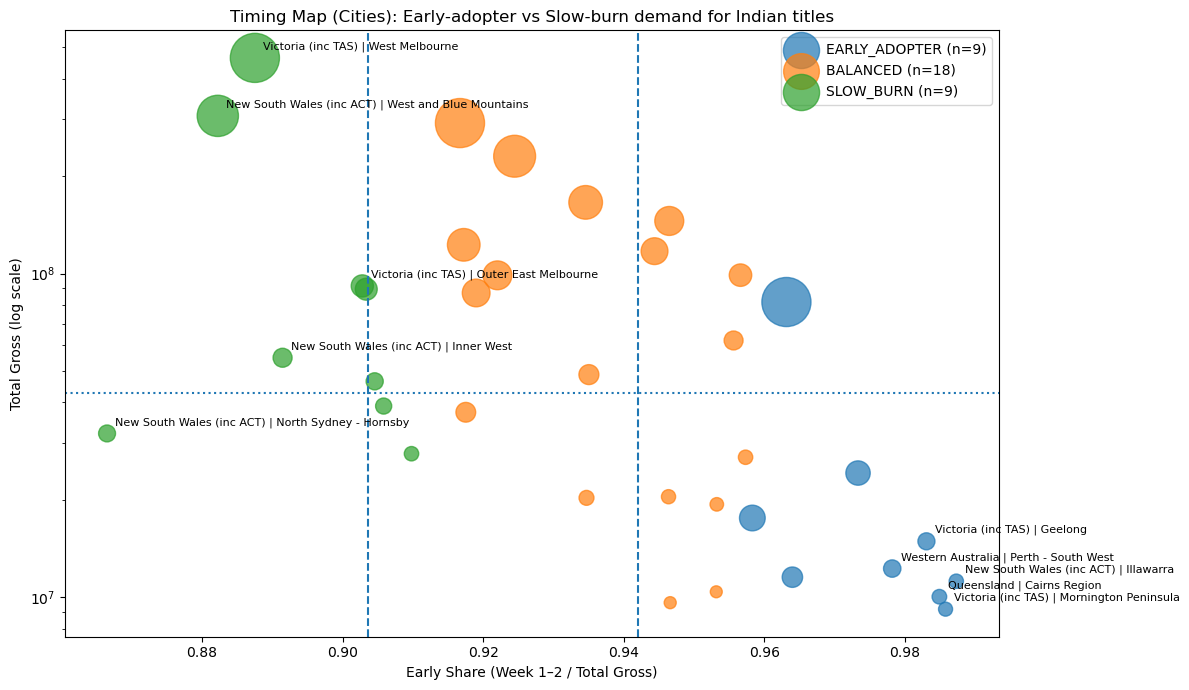

In [180]:
import matplotlib.pyplot as plt

def timing_map(df, title, min_total, early_thr, slow_thr, label_col, annotate_top_n=8):
    fig, ax = plt.subplots(figsize=(12, 7))

    # Split by class (separate scatters so matplotlib auto-assigns distinct colors without us hardcoding)
    for cls in ["EARLY_ADOPTER", "BALANCED", "SLOW_BURN"]:
        d = df[df["timing_class"] == cls].copy()
        if len(d) == 0:
            continue

        # Bubble size proportional to W3plus (tail), but scaled for readability
        sizes = (d["W3plus"] / d["W3plus"].max()) * 1200 + 50

        ax.scatter(
            d["early_share"],
            d["total_gross"],
            s=sizes,
            alpha=0.7,
            label=f"{cls} (n={len(d)})"
        )

    ax.set_yscale("log")
    ax.set_xlabel("Early Share (Week 1–2 / Total Gross)")
    ax.set_ylabel("Total Gross (log scale)")
    ax.set_title(title)

    # Reference lines: thresholds + eligibility cutoff
    ax.axvline(early_thr, linestyle="--")
    ax.axvline(slow_thr, linestyle="--")
    ax.axhline(min_total, linestyle=":")

    # Annotate the most decision-relevant points:
    # choose extremes by early_share, and also high tail (W3plus)
    cand = df.copy()
    cand["tail_rank"] = cand["W3plus"].rank(ascending=False)
    cand["early_rank"] = cand["early_share"].rank(ascending=False)
    cand["slow_rank"] = cand["early_share"].rank(ascending=True)

    to_annotate = pd.concat([
        cand.sort_values("early_rank").head(annotate_top_n//2),
        cand.sort_values("slow_rank").head(annotate_top_n//2),
        cand.sort_values("tail_rank").head(max(2, annotate_top_n//3)),
    ]).drop_duplicates().head(annotate_top_n)

    for _, r in to_annotate.iterrows():
        ax.annotate(
            r[label_col],
            (r["early_share"], r["total_gross"]),
            textcoords="offset points",
            xytext=(6, 6),
            fontsize=8
        )

    ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

timing_map(
    plot_city,
    title="Timing Map (Cities): Early-adopter vs Slow-burn demand for Indian titles",
    min_total=city_min_total,
    early_thr=city_early_thr,
    slow_thr=city_slow_thr,
    label_col="label",
    annotate_top_n=10
)

In [182]:
# Use the Step 3 thresholds (the ones that generated timing_class)
city_min_total = 9202190
city_early_thr = 0.9576
city_slow_thr  = 0.9150

cin_min_total  = 2516261
cin_early_thr  = 0.9696
cin_slow_thr   = 0.9170

print("Using classification thresholds:")
print("CITY:", city_min_total, city_early_thr, city_slow_thr)
print("CINEMA:", cin_min_total, cin_early_thr, cin_slow_thr)

Using classification thresholds:
CITY: 9202190 0.9576 0.915
CINEMA: 2516261 0.9696 0.917


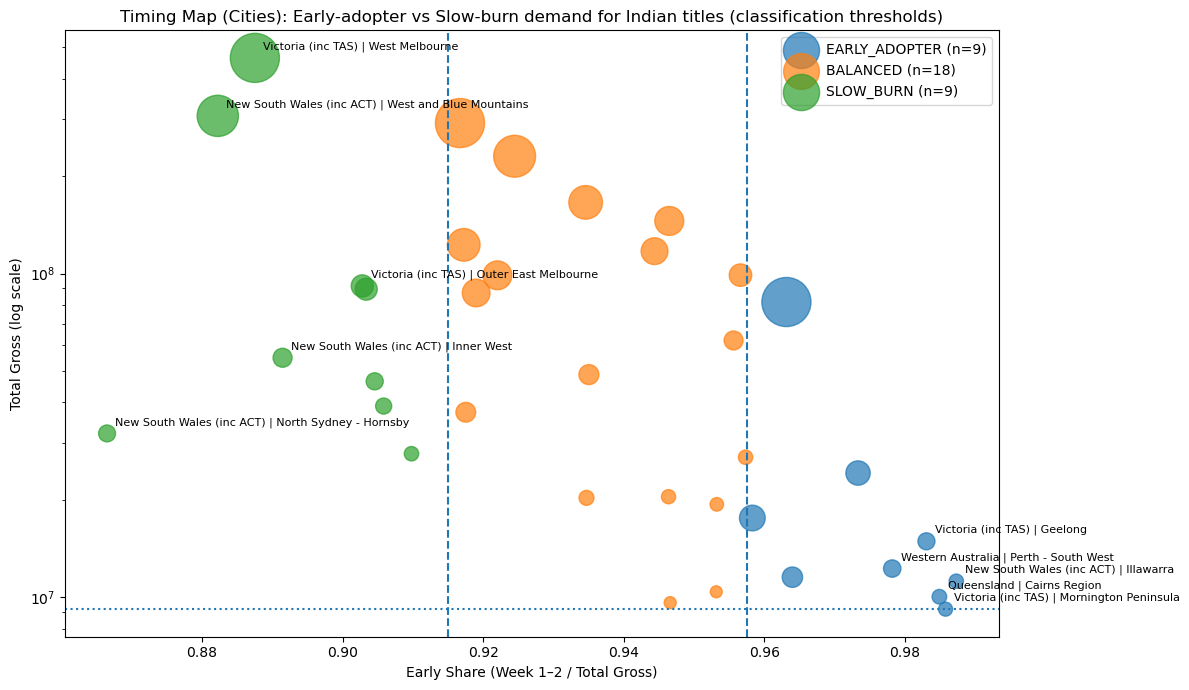

In [183]:
timing_map(
    plot_city,
    title="Timing Map (Cities): Early-adopter vs Slow-burn demand for Indian titles (classification thresholds)",
    min_total=city_min_total,
    early_thr=city_early_thr,
    slow_thr=city_slow_thr,
    label_col="label",
    annotate_top_n=10
)

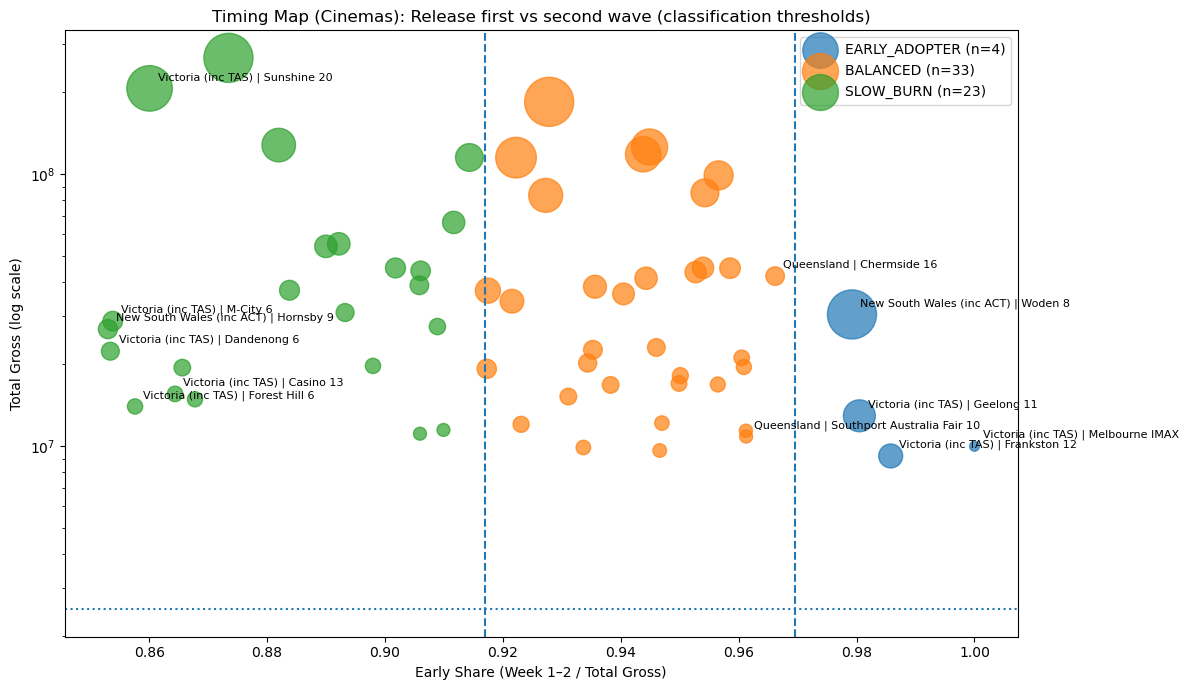

In [184]:
timing_map(
    plot_cinema,
    title="Timing Map (Cinemas): Release first vs second wave (classification thresholds)",
    min_total=cin_min_total,
    early_thr=cin_early_thr,
    slow_thr=cin_slow_thr,
    label_col="label",
    annotate_top_n=12
)

In [189]:
import numpy as np
import pandas as pd

# We already have mat_share (Top 40 cities x weeks 1..8, row-normalized).
# Build cumulative share by week
cum_city = mat_share.cumsum(axis=1)

# Attach timing_class for coloring/grouping
city_meta = (
    city_classified.set_index(["state", "city"])[["timing_class", "total_gross"]]
    .reindex(cum_city.index)
)

cum_city_plot = cum_city.copy()
cum_city_plot["timing_class"] = city_meta["timing_class"].values
cum_city_plot["total_gross"] = city_meta["total_gross"].values

print("cum_city_plot shape:", cum_city_plot.shape)
print("Weeks:", list(mat_share.columns))
print("Cumulative end (min/max):", cum_city.iloc[:, -1].min(), cum_city.iloc[:, -1].max())
print("\nClass counts:")
print(cum_city_plot["timing_class"].value_counts(dropna=False))

# Show a few rows to confirm values make sense (should end near 1.0)
display(cum_city_plot.head(5))

cum_city_plot shape: (40, 10)
Weeks: [1, 2, 3, 4, 5, 6, 7, 8]
Cumulative end (min/max): 0.9999999999999998 1.0000000000000002

Class counts:
timing_class
BALANCED         18
EARLY_ADOPTER     9
SLOW_BURN         9
NaN               4
Name: count, dtype: int64


film_week_cap                                          1         2         3  \
state                     city                                                 
New South Wales (inc ACT) Canberra              0.792175  0.963142  0.997565   
                          City and Inner South  0.935559  0.953161  0.976746   
                          Hills & Hawkesbury    0.723762  0.904556  0.971886   
                          Illawarra             0.885867  0.987314  1.000000   
                          Inner West            0.680016  0.891452  0.968408   

film_week_cap                                          4         5        6  \
state                     city                                                
New South Wales (inc ACT) Canberra              0.999524  1.000000  1.00000   
                          City and Inner South  0.978436  0.979359  0.97982   
                          Hills & Hawkesbury    0.993887  1.000000  1.00000   
                          Illawarra             1.000000  1.000000  1.00000   
                          Inner West            0.993242  1.000000  1.00000   

film_week_cap                                          7    8   timing_class  \
state                     city                                                 
New South Wales (inc ACT) Canberra              1.000000  1.0  EARLY_ADOPTER   
                          City and Inner South  0.982048  1.0       BALANCED   
                          Hills & Hawkesbury    1.000000  1.0      SLOW_BURN   
                          Illawarra             1.000000  1.0  EARLY_ADOPTER   
                          Inner West            1.000000  1.0      SLOW_BURN   

film_week_cap                                   total_gross  
state                     city                               
New South Wales (inc ACT) Canberra               81710230.0  
                          City and Inner South   10411109.0  
                          Hills & Hawkesbury     46493982.0  
                          Illawarra              11224255.0  
                          Inner West             54980391.0

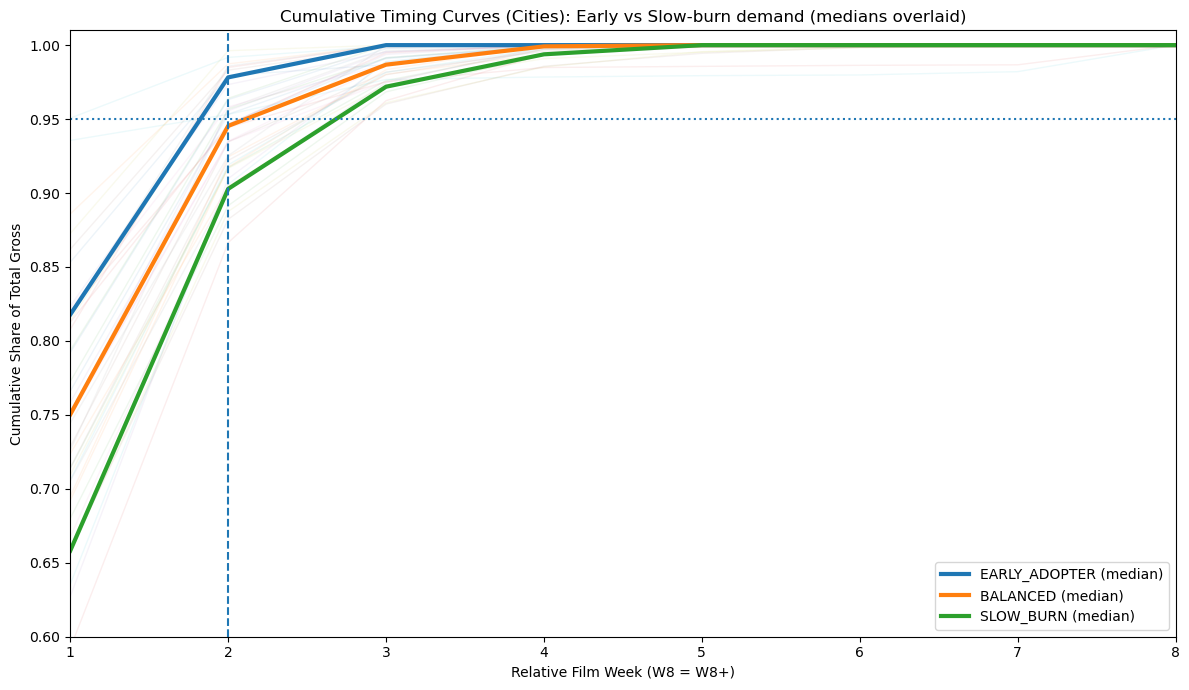

In [194]:
import matplotlib.pyplot as plt
import numpy as np

weeks = [1,2,3,4,5,6,7,8]

plot_curves = cum_city_plot.copy()
plot_curves["timing_class"] = plot_curves["timing_class"].fillna("BALANCED")

fig, ax = plt.subplots(figsize=(12, 7))

# 1) Spaghetti lines (all cities), very transparent
for cls in ["EARLY_ADOPTER", "BALANCED", "SLOW_BURN"]:
    d = plot_curves[plot_curves["timing_class"] == cls]
    for _, row in d.iterrows():
        y = row[weeks].values.astype(float)
        ax.plot(weeks, y, alpha=0.08, linewidth=1)

# 2) Thick median curve per class (this is what people will read)
for cls in ["EARLY_ADOPTER", "BALANCED", "SLOW_BURN"]:
    d = plot_curves[plot_curves["timing_class"] == cls]
    if d.empty:
        continue
    Y = d[weeks].astype(float).values
    med = np.median(Y, axis=0)
    ax.plot(weeks, med, linewidth=3, label=f"{cls} (median)")

# Reference lines
ax.axvline(2, linestyle="--", linewidth=1.5)
ax.axhline(0.95, linestyle=":", linewidth=1.5)

# Labels and layout
ax.set_title("Cumulative Timing Curves (Cities): Early vs Slow-burn demand (medians overlaid)")
ax.set_xlabel("Relative Film Week (W8 = W8+)")
ax.set_ylabel("Cumulative Share of Total Gross")

ax.set_xlim(1, 8)
ax.set_ylim(0.6, 1.01)
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [195]:
import numpy as np
import pandas as pd

weeks = [1,2,3,4,5,6,7,8]

# cum_city is the cumulative matrix from Step B1: rows=(state,city), cols=weeks
# city_meta aligns timing_class and total_gross
city_meta = (
    city_classified.set_index(["state", "city"])[["timing_class", "total_gross"]]
    .reindex(cum_city.index)
)

# Fill missing class as BALANCED (these were outside the Step 3 eligibility subset)
timing_cls = city_meta["timing_class"].fillna("BALANCED")
tot_gross  = city_meta["total_gross"]

def weeks_to_threshold(cum_row, thr=0.95):
    # cum_row is a Series indexed by week numbers 1..8
    hit = cum_row[cum_row >= thr]
    return int(hit.index[0]) if len(hit) else 8  # if never hits, treat as 8 (W8+)

city_kpi = cum_city.copy()
city_kpi["weeks_to_95"] = cum_city.apply(weeks_to_threshold, axis=1)
city_kpi["timing_class"] = timing_cls.values
city_kpi["total_gross"] = tot_gross.values

city_kpi = city_kpi.reset_index()  # columns: state, city, weeks..., weeks_to_95, timing_class, total_gross

# Filter: keep meaningful markets only (same idea as earlier; adjust if you want)
MIN_TOTAL = city_kpi["total_gross"].quantile(0.50)
city_kpi_f = city_kpi[city_kpi["total_gross"] >= MIN_TOTAL].copy()

print("City MIN_TOTAL (median):", f"{MIN_TOTAL:,.0f}")
print("Rows kept:", city_kpi_f.shape[0])

cols_show = ["state","city","total_gross","weeks_to_95","timing_class"]
print("\nTop 10 EARLIEST cities (hit 95% fastest):")
display(
    city_kpi_f.sort_values(["weeks_to_95","total_gross"], ascending=[True, False])
    .head(10)[cols_show]
)

print("\nTop 10 LATEST cities (slow-burn; hit 95% latest):")
display(
    city_kpi_f.sort_values(["weeks_to_95","total_gross"], ascending=[False, False])
    .head(10)[cols_show]
)

# Optional: distribution
display(city_kpi_f["weeks_to_95"].value_counts().sort_index().rename("city_count_by_weeks_to_95"))

City MIN_TOTAL (median): 42,746,219
Rows kept: 18

Top 10 EARLIEST cities (hit 95% fastest):


film_week_cap,state,city,total_gross,weeks_to_95,timing_class
24,South Australia,Adelaide - West,98912114.0,2,BALANCED
0,New South Wales (inc ACT),Canberra,81710230.0,2,EARLY_ADOPTER
13,Queensland,Brisbane - North,62164560.0,2,BALANCED
35,Victoria (inc TAS),West Melbourne,463563113.0,3,SLOW_BURN
11,New South Wales (inc ACT),West and Blue Mountains,306961494.0,3,SLOW_BURN
34,Victoria (inc TAS),South East Melbourne,291653567.0,3,BALANCED
8,New South Wales (inc ACT),Parramatta & Ryde,230392059.0,3,BALANCED
14,Queensland,Brisbane - South,165957653.0,3,BALANCED
38,Western Australia,Perth - South East,145420110.0,3,BALANCED
9,New South Wales (inc ACT),South West Sydney,122717514.0,3,BALANCED



Top 10 LATEST cities (slow-burn; hit 95% latest):


film_week_cap,state,city,total_gross,weeks_to_95,timing_class
35,Victoria (inc TAS),West Melbourne,463563113.0,3,SLOW_BURN
11,New South Wales (inc ACT),West and Blue Mountains,306961494.0,3,SLOW_BURN
34,Victoria (inc TAS),South East Melbourne,291653567.0,3,BALANCED
8,New South Wales (inc ACT),Parramatta & Ryde,230392059.0,3,BALANCED
14,Queensland,Brisbane - South,165957653.0,3,BALANCED
38,Western Australia,Perth - South East,145420110.0,3,BALANCED
9,New South Wales (inc ACT),South West Sydney,122717514.0,3,BALANCED
25,Victoria (inc TAS),Central Inner Melbourne,117313510.0,3,BALANCED
30,Victoria (inc TAS),North East Melbourne,98793025.0,3,BALANCED
32,Victoria (inc TAS),Outer East Melbourne,91621409.0,3,SLOW_BURN


weeks_to_95
2     3
3    15
Name: city_count_by_weeks_to_95, dtype: int64

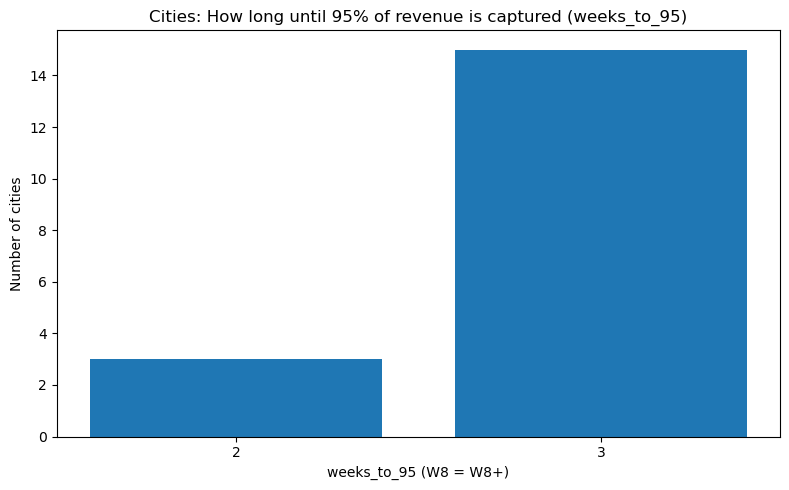

In [197]:
import matplotlib.pyplot as plt

# Counts of cities by weeks_to_95
counts_city = city_kpi_f["weeks_to_95"].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(counts_city.index.astype(str), counts_city.values)
plt.title("Cities: How long until 95% of revenue is captured (weeks_to_95)")
plt.xlabel("weeks_to_95 (W8 = W8+)")
plt.ylabel("Number of cities")
plt.tight_layout()
plt.show()

In [196]:
# Build cinema matrix (Top N) using the same approach as Step A1, then compute weeks_to_95.

df = sales_w.copy()
df["gross_clean"] = pd.to_numeric(df["gross_today"], errors="coerce").fillna(0)

keys = ["state","city","theatre_name"]
MAX_WEEK = 8
df["film_week_cap"] = np.where(df["film_week"] >= MAX_WEEK, MAX_WEEK, df["film_week"]).astype(int)

weekly_c = (
    df.groupby(keys + ["film_week_cap"], dropna=False)["gross_clean"]
      .sum()
      .reset_index()
)
totals_c = weekly_c.groupby(keys, dropna=False)["gross_clean"].sum().reset_index(name="total_gross")

TOP_N = 80
top_cinemas = totals_c.sort_values("total_gross", ascending=False).head(TOP_N)
weekly_c_top = weekly_c.merge(top_cinemas[keys], on=keys, how="inner")

mat_c = weekly_c_top.pivot_table(index=keys, columns="film_week_cap", values="gross_clean", fill_value=0)
for w in range(1, MAX_WEEK + 1):
    if w not in mat_c.columns:
        mat_c[w] = 0.0
mat_c = mat_c[sorted(mat_c.columns)]
mat_c_share = mat_c.div(mat_c.sum(axis=1), axis=0).fillna(0)

cum_cinema = mat_c_share.cumsum(axis=1)

cin_meta = (
    cinema_classified.set_index(keys)[["timing_class", "total_gross"]]
    .reindex(cum_cinema.index)
)

cin_kpi = cum_cinema.copy()
cin_kpi["weeks_to_95"] = cum_cinema.apply(weeks_to_threshold, axis=1)
cin_kpi["timing_class"] = cin_meta["timing_class"].fillna("BALANCED").values
cin_kpi["total_gross"] = cin_meta["total_gross"].values

cin_kpi = cin_kpi.reset_index()

MIN_TOTAL_C = cin_kpi["total_gross"].quantile(0.50)
cin_kpi_f = cin_kpi[cin_kpi["total_gross"] >= MIN_TOTAL_C].copy()

print("Cinema MIN_TOTAL (median):", f"{MIN_TOTAL_C:,.0f}")
print("Rows kept:", cin_kpi_f.shape[0])

cols_show_c = ["state","city","theatre_name","total_gross","weeks_to_95","timing_class"]

print("\nTop 10 EARLIEST cinemas (hit 95% fastest):")
display(
    cin_kpi_f.sort_values(["weeks_to_95","total_gross"], ascending=[True, False])
    .head(10)[cols_show_c]
)

print("\nTop 10 LATEST cinemas (slow-burn; hit 95% latest):")
display(
    cin_kpi_f.sort_values(["weeks_to_95","total_gross"], ascending=[False, False])
    .head(10)[cols_show_c]
)

display(cin_kpi_f["weeks_to_95"].value_counts().sort_index().rename("cinema_count_by_weeks_to_95"))

Cinema MIN_TOTAL (median): 19,338,804
Rows kept: 40

Top 10 EARLIEST cinemas (hit 95% fastest):


film_week_cap,state,city,theatre_name,total_gross,weeks_to_95,timing_class
44,South Australia,Adelaide - West,Hoyts Arndale 8,98893614.0,2,BALANCED
47,Victoria (inc TAS),Central Inner Melbourne,Docklands 8,85324956.0,2,BALANCED
70,Victoria (inc TAS),West Melbourne,Watergardens 8,45209545.0,2,BALANCED
31,Queensland,Brisbane - South,Sunnybank 8,45092275.0,2,BALANCED
0,New South Wales (inc ACT),Canberra,Belconnen 10,43613886.0,2,BALANCED
26,Queensland,Brisbane - North,Chermside 16,42177389.0,2,BALANCED
2,New South Wales (inc ACT),Canberra,Woden 8,30492454.0,2,EARLY_ADOPTER
37,Queensland,Ipswich Region,Springfield 8,21118958.0,2,BALANCED
16,New South Wales (inc ACT),South West Sydney,Ed Square 6,19541315.0,2,BALANCED
20,New South Wales (inc ACT),West and Blue Mountains,Blacktown 10,267356543.0,3,SLOW_BURN



Top 10 LATEST cinemas (slow-burn; hit 95% latest):


film_week_cap,state,city,theatre_name,total_gross,weeks_to_95,timing_class
69,Victoria (inc TAS),West Melbourne,Sunshine 20,206539553.0,4,SLOW_BURN
66,Victoria (inc TAS),South East Melbourne,M-City 6,28805085.0,4,SLOW_BURN
20,New South Wales (inc ACT),West and Blue Mountains,Blacktown 10,267356543.0,3,SLOW_BURN
12,New South Wales (inc ACT),Parramatta & Ryde,Parramatta 11,184347613.0,3,BALANCED
71,Victoria (inc TAS),West Melbourne,Werribee 12,127837140.0,3,SLOW_BURN
76,Western Australia,Perth - South East,Carousel 14,125751373.0,3,BALANCED
63,Victoria (inc TAS),South East Melbourne,Chadstone 13,118309310.0,3,BALANCED
65,Victoria (inc TAS),South East Melbourne,Fountain Gate 14,115086798.0,3,SLOW_BURN
29,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,114941736.0,3,BALANCED
68,Victoria (inc TAS),West Melbourne,Highpoint 18,83519230.0,3,BALANCED


weeks_to_95
2     9
3    29
4     2
Name: cinema_count_by_weeks_to_95, dtype: int64

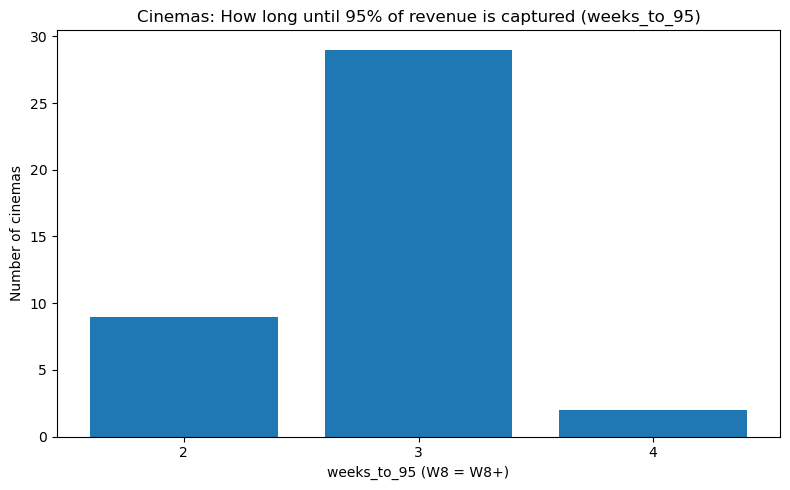

In [198]:
import matplotlib.pyplot as plt

counts_cin = cin_kpi_f["weeks_to_95"].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(counts_cin.index.astype(str), counts_cin.values)
plt.title("Cinemas: How long until 95% of revenue is captured (weeks_to_95)")
plt.xlabel("weeks_to_95 (W8 = W8+)")
plt.ylabel("Number of cinemas")
plt.tight_layout()
plt.show()

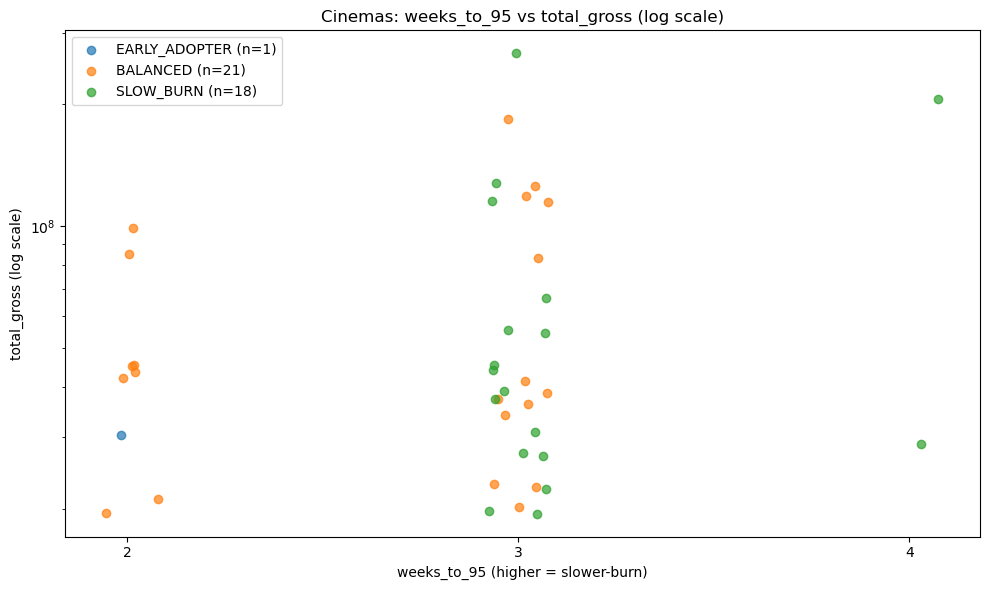

In [199]:
import matplotlib.pyplot as plt
import numpy as np

dfp = cin_kpi_f.copy()

plt.figure(figsize=(10,6))

# plot each class separately so matplotlib assigns distinct default colors
for cls in ["EARLY_ADOPTER", "BALANCED", "SLOW_BURN"]:
    d = dfp[dfp["timing_class"] == cls].copy()
    if d.empty:
        continue

    # small jitter so points don’t overlap perfectly
    x = d["weeks_to_95"].astype(float) + np.random.uniform(-0.08, 0.08, size=len(d))
    y = d["total_gross"].astype(float)

    plt.scatter(x, y, alpha=0.7, label=f"{cls} (n={len(d)})")

plt.yscale("log")
plt.xticks(sorted(dfp["weeks_to_95"].unique()))
plt.title("Cinemas: weeks_to_95 vs total_gross (log scale)")
plt.xlabel("weeks_to_95 (higher = slower-burn)")
plt.ylabel("total_gross (log scale)")
plt.legend()
plt.tight_layout()
plt.show()